# **TR-2021/XX - Technical report: Extreme value distribution in IAC data (2000 - 2016)**

|Technical Report ID  |2021/XX|
|--|--|
| Title | Extreme value distribution in IAC data (2000 - 2016)|
| Authors | Guilherme Lisboa, Paula Dornhofer|
| Creation Date| 2021 - july|


**DESCRIPTION**: 

This notebook was created to analyze the distribution of the week's maximum temperature in the city of Campinas, São Paulo, Brazil, using daily data from IAC. The main objective is to decide if Generalized extreme value distribution fits these extremes. And compare the use of 16, 8, and 4 years of data.

**TUTORIALS**
https://www.linkedin.com/pulse/beginners-guide-carry-out-extreme-value-analysis-2-chonghua-yin/

and

https://www.linkedin.com/pulse/beginners-guide-carry-out-extreme-value-analysis-2-chonghua-yin/


##**Impor data and python library**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')



Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from matplotlib.legend_handler import HandlerLine2D
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

import numpy as np
import scipy as _sp
import scipy.special as _spsp
import scipy.stats as _spst
import math as _math
import sys as _sys
from scipy import stats as stats


##**Def functions from package "Lmom"**
Package does not work with current python version

In [ ]:
def lmrexp(para,nmom):
    A=para[1]
    if A <= 0:
        print("Invalid Parameters")
        return
    if nmom > 20:
        print("Parameter nmom too large")
    xmom = []
    xmom.append(para[0]+A)
    if nmom == 1:
        return(xmom)

    xmom.append(0.5*A)
    if nmom ==2:
        return(xmom)

    for i in range(3,nmom+1):
        xmom.append(2/float(i*(i-1)))

    return(xmom)
    
#############################################################

def lmrgam(para,nmom):
    A0 = 0.32573501
    [A1,A2,A3] = [0.16869150, 0.078327243,-0.0029120539]
    [B1,B2] = [0.46697102, 0.24255406]
    C0 = 0.12260172
    [C1,C2,C3] = [0.053730130, 0.043384378, 0.011101277]
    [D1,D2]    = [0.18324466, 0.20166036]
    [E1,E2,E3] = [2.3807576, 1.5931792, 0.11618371]
    [F1,F2,F3] = [5.1533299, 7.1425260, 1.9745056]
    [G1,G2,G3] = [2.1235833, 4.1670213, 3.1925299]
    [H1,H2,H3] = [9.0551443, 26.649995, 26.193668]

    Alpha = para[0]
    Beta = para[1]
    if Alpha <= 0 or Beta <= 0:
        print("Invalid Parameters")
        return
    if nmom > 4:
        print("Parameter nmom too large")
        return
    
    xmom = []
    xmom.append(Alpha*Beta)
    if nmom == 1:
        return(xmom)

    xmom.append(Beta*1/_sp.sqrt(_sp.pi)*_sp.exp(_spsp.gammaln(Alpha+0.5)-_spsp.gammaln(Alpha)))
    if nmom == 2:
        return(xmom)

    if Alpha < 1:
        Z= Alpha
        xmom.append((((E3*Z+E2)*Z+E1)*Z+1)/(((F3*Z+F2)*Z+F1)*Z+1))
        if nmom == 3:
            return(xmom)
        xmom.append((((C3*Z+C2)*Z+C1)*Z+C0)/((D2*Z+D1)*Z+1))
        if nmom == 4:
            return(xmom)
    else:
        Z=1/Alpha
        xmom.append(_sp.sqrt(Z)*(((A3*Z+A2)*Z+A1)*Z+A0)/((B2*Z+B1)*Z+1))
        if nmom == 3:
            return(xmom)
        
        xmom.append((((C3*Z+C2)*Z+C1)*Z+C0)/((D2*Z+D1)*Z+1))
        if nmom == 4:
            return(xmom)

#############################################################

def lmrgev(para,nmom):

    ZMOM=[0.577215664901532861, 0.693147180559945309,
        0.169925001442312363,0.150374992788438185,
        0.558683500577583138e-1,0.581100239999710876e-1,
        0.276242584297309125e-1,0.305563766579053126e-1,
        0.164650282258328802e-1,0.187846624298170912e-1,
        0.109328215063027148e-1,0.126973126676329530e-1,
        0.778982818057231804e-2,0.914836179621999726e-2,
        0.583332389328363588e-2,0.690104287590348154e-2,
        0.453267970180679549e-2,0.538916811326595459e-2,
        0.362407767772390e-2,0.432387608605538096e-2]
    SMALL = 1e-6
    U = para[0]
    A = para[1]
    G = para[2]
    if A<= 0 or G <= -1:
        print("Invalid Parameters")
        return
    if nmom > 20:
        print("Parameter nmom too large")
        return

    if abs(G)>SMALL:
        GAM = _sp.exp(_spsp.gammaln(1+G))
        xmom = [U+A*(1-GAM)/G]
        if nmom == 1:
            return(xmom)

        XX2 = 1-2**(-G)
        xmom.append(A*XX2*GAM/G)
        if nmom == 2:
            return(xmom)
 
        Z0=1
        for j in range(2,nmom):
            DJ=j+1
            BETA = (1-DJ**(-G))/XX2
            Z0 = Z0*(4*DJ-6)/DJ
            Z = Z0*3*(DJ-1)/(DJ+1)
            SUM = Z0*BETA-Z
            if j == 2:
                xmom.append(SUM)
            else:
                for i in range(1,j-1):
                    DI = i+1
                    Z = Z*(DI+DI+1)*(DJ-DI)/((DI+DI-1)*(DJ+DI))
                    SUM = SUM-Z*xmom[i+1]
                xmom.append(SUM)
        return(xmom)
    
    else:
        xmom = [U]
        if nmom == 1:
            return(xmom)

        xmom.append(A*ZMOM[1])
        if nmom == 2:
            return(xmom)

        for i in range(2,nmom):
            xmom.append(zmom[i-1])

        return(xmom)
  
#############################################################
    
def lmrglo(para,nmom):
    SMALL = 1e-4
    C1 = _sp.pi**2/6
    C2 = 7*_sp.pi**4/360


    Z = [[0],[0]]
    Z.append([1])
    Z.append([0.166666666666666667,  0.833333333333333333])
    Z.append([0.416666666666666667,  0.583333333333333333])
    Z.append([0.666666666666666667e-1,  0.583333333333333333,
              0.350000000000000000])
    Z.append([0.233333333333333333,  0.583333333333333333,
              0.183333333333333333])

    Z.append([0.357142857142857143e-1,  0.420833333333333333,
              0.458333333333333333,  0.851190476190476190e-1])

    Z.append([0.150992063492063492,  0.515625000000000000,
              0.297916666666666667,  0.354662698412698413e-1])

    Z.append([0.222222222222222222e-1,  0.318893298059964727,
              0.479976851851851852,  0.165509259259259259,
              0.133983686067019400e-1])

    Z.append([0.106507936507936508,  0.447663139329805996,
              0.360810185185185185,  0.803902116402116402e-1,
              0.462852733686067019e-2])

    Z.append([0.151515151515151515e-1,  0.251316137566137566,
              0.469695216049382716,  0.227650462962962963,
              0.347139550264550265e-1,  0.147271324354657688e-2])

    Z.append([0.795695045695045695e-1,  0.389765946502057613,
              0.392917309670781893,  0.123813106261022928,
              0.134998713991769547e-1,  0.434261597456041900e-3])

    Z.append([0.109890109890109890e-1,  0.204132996632996633,
              0.447736625514403292,  0.273053442827748383,
              0.591917438271604938e-1,  0.477687757201646091e-2,
              0.119302636663747775e-3])

    Z.append([0.619345205059490774e-1,  0.342031759392870504,
              0.407013705173427396,  0.162189192806752331,
              0.252492100235155791e-1,  0.155093427662872107e-2,
              0.306778208563922850e-4])

    Z.append([0.833333333333333333e-2,  0.169768364902293474,
              0.422191282868366202,  0.305427172894620811,
              0.840827939972285210e-1,  0.972435791446208113e-2,
              0.465280282988616322e-3,  0.741380670696146887e-5])

    Z.append([0.497166028416028416e-1,  0.302765838589871328,
              0.410473300089185506,  0.194839026503251764,
              0.386598063704648526e-1,  0.341399407642897226e-2,
              0.129741617371825705e-3,  0.168991182291033482e-5])
             
    Z.append([0.653594771241830065e-2,  0.143874847595085690,
              0.396432853710259464,  0.328084180720899471,
              0.107971393165194318,  0.159653369932077769e-1,
              0.110127737569143819e-2,  0.337982364582066963e-4,
              0.364490785333601627e-6])

    Z.append([0.408784570549276431e-1,  0.270244290725441519,
              0.407599524514551521,  0.222111426489320008,
              0.528463884629533398e-1,  0.598298239272872761e-2,
              0.328593965565898436e-3,  0.826179113422830354e-5,
              0.746033771150646605e-7])

    Z.append([0.526315789473684211e-2,  0.123817655753054913,
              0.371859291444794917,  0.343568747670189607,
              0.130198662812524058,  0.231474364899477023e-1,
              0.205192519479869981e-2,  0.912058258107571930e-4,
              0.190238611643414884e-5,  0.145280260697757497e-7])

    U = para[0]
    A = para[1]
    G = para[2]

    if A <= 0 or abs(G) >= 1:
        print("Invalid Parameters")
        return

    if nmom > 20:
        print("Parameter nmom too large")
        return
    GG = G*G
    ALAM1 = -G*(C1+GG*C2)
    ALAM2 = 1+GG*(C1+GG*C2)
    if abs(G) > SMALL:
        ALAM2=G*_sp.pi/_sp.sin(G*_sp.pi)
        ALAM1=(1-ALAM2)/G

    xmom = [U+A*ALAM1]
    if nmom == 1:
        return(xmom)
             
    xmom.append(A*ALAM2)
    if nmom == 2:
        return(xmom)

    for M in range(3,nmom+1):
        kmax = M/2
        SUMM=Z[M-1][kmax-1]
        for K in range(kmax-1,0,-1):
            SUMM = SUMM*GG+Z[M-1][K-1]
        if M != M/2*2:
            SUMM = -G*SUMM
        xmom.append(SUMM)

    return(xmom)

#############################################################

def lmrgno(para,nmom):

    ZMOM = [0,   0.564189583547756287, 0,   0.122601719540890947,
            0,   0.436611538950024944e-1,0, 0.218431360332508776e-1,
            0,   0.129635015801507746e-1,0, 0.852962124191705402e-2,
            0,   0.601389015179323333e-2,0, 0.445558258647650150e-2,
            0,   0.342643243578076985e-2,0, 0.271267963048139365e-2]


    RRT2 = 1/_sp.sqrt(2)
    RRTPI = 1/_sp.sqrt(_sp.pi)
    
    RANGE = 5
    EPS = 1e-8
    MAXIT = 10

    U = para[0]
    A = para[1]
    G = para[2]
    if A <= 0:
        print("Invalid Parameters")
        return
    if nmom > 20:
        print("Parameter nmom too large")
        return

    

    if abs(G)<=EPS:
        xmom = [U]
        if nmom == 1:
            return(xmom)

        xmom.append(A*ZMOM[1])
        if nmom == 2:
            return(xmom)

        for i in range(3,nmom+1):
            xmom.append(zmom[i-1])

        return(xmom)


    EGG = _sp.exp(0.5*G**2)
    ALAM1 = (1-EGG)/G
    xmom = [U+A*ALAM1]
    if nmom == 1:
        return(xmom)
    
    ALAM2=EGG*_spsp.erf(0.5*G)/G
    xmom.append(A*ALAM2)
    if nmom == 2:
        return(xmom)
  
    CC=-G*RRT2
    XMIN=CC-RANGE
    XMAX=CC+RANGE
    SUMM = [0]*nmom
    
    N=16
    XINC=(XMAX-XMIN)/N

    for i in range(1,N):
        X = XMIN+i*XINC
        E = _sp.exp(-((X-CC)**2))
        D = _spsp.erf(X)
        P1 = 1
        P = D
        for M in range(3,nmom+1):
            C1=M+M-3
            C2=M-2
            C3=M-1
            P2=P1
            P1=P
            P=(C1*D*P1-C2*P2)/C3
            SUMM[M-1] = SUMM[M-1]+E*P

    EST = []
    for i in SUMM:
        EST.append(i*XINC)


    for IT in range(1,MAXIT+1):
        ESTX = EST
        N=N*2
        XINC=(XMAX-XMIN)/N
        for i in range(1,N-1,2):
            X = XMIN+i*XINC
            E = _sp.exp(-((X-CC)**2))
            D = _spsp.erf(X)
            P1 = 1
            P = D
            for M in range(3,nmom+1):
                C1=M+M-3
                C2=M-2
                C3=M-1
                P2=P1
                P1=P
                P=(C1*D*P1-C2*P2)/C3
                SUMM[M-1] = SUMM[M-1]+E*P

        NOTCGD = 0
        for M in range(nmom,2,-1):
            EST[M-1] = SUMM[M-1]*XINC
            if abs(EST[M-1]-ESTX[M-1]) > EPS*abs(EST[M-1]):
                NOTCGD = M

        if NOTCGD == 0:
            CONST = -_sp.exp(CC**2)*RRTPI/(ALAM2*G)
            
            for M in range(3,nmom+1):
                xmom.append(CONST*EST[M-1])
            return(xmom)
        else:
            print("Did Not Converge")
            return
        
#############################################################
                
def lmrgpa(para,nmom):
    U = para[0]
    A = para[1]
    G = para[2]
    if A <=0 or G < -1:
        print("Invalid Parameters")
        return
    if nmom > 20:
        print("Parameter nmom too large")
        return

    Y = 1/(1+G)
    xmom = [U+A*Y]
    if nmom == 1:
        return(xmom)
    
    Y = Y/(2+G)
    xmom.append(A*Y)
    if nmom == 2:
        return(xmom)
    
    Y = 1
    for i in range(3,nmom+1):
        AM = i-2
        Y = Y*(AM-G)/(i+G)
        xmom.append(Y)
    return(xmom)

#############################################################

def lmrgum(para,nmom):
    ZMOM = [0.577215664901532861,  0.693147180559945309,
     0.169925001442312363,  0.150374992788438185,
     0.0558683500577583138,  0.0581100239999710876,
     0.0276242584297309125,  0.0305563766579053126,
     0.0164650282258328802,  0.0187846624298170912,
     0.0109328215063027148,  0.0126973126676329530,
     0.00778982818057231804,  0.00914836179621999726,
     0.00583332389328363588,  0.00690104287590348154,
     0.00453267970180679549,  0.00538916811326595459,
     0.00362407767772368790,  0.00432387608605538096]

    A = para[1]
    if A <=0:
        print("Invalid Parameters")
        return
    if nmom >20:
        print("Parameter nmom too large")
        return
    xmom = [para[0]+A*ZMOM[0]]
    if nmom == 1:
        return(xmom)
    xmom.append(A*ZMOM[1])
    if nmom == 2:
        return(xmom)

    for i in range(2,nmom):
        xmom.append(ZMOM[i])
    return(xmom)

#############################################################

def lmrkap(para,nmom):
    EU = 0.577215664901532861
    SMALL = 1e-8
    OFL = 170
    U = para[0]
    A = para[1]
    G = para[2]
    H = para[3]

    if A <= 0 or G <= -1: 
        print("Invalid Parameters")
        return
    if H < 0 and (G*H)<= -1:
        print("Invalid Parameters")
        return
    if nmom > 20:
        print("Parameter nmom too large")
        return

    DLGAM = _spsp.gammaln(1+G)
    ICASE = 1
    if H > 0:
        ICASE = 3
    elif abs(H) < SMALL:
        ICASE = 2
    elif G == 0:
        ICASE = ICASE+3

    if ICASE == 1:
        Beta = []
        for IR in range(1,nmom+1):
            ARG = DLGAM + _spsp.gammaln(-IR/H-G) - _spsp.gammaln(-IR/H)-G*_sp.log(-H)
            if abs(ARG) > OFL:
                print("Calculation of L-Moments Failed")
                return
            Beta.append(_sp.exp(ARG))


    elif ICASE == 2:
        Beta = []
        for IR in range(1,nmom+1):
            Beta.append(_sp.exp(DLGAM-G*_sp.log(IR))*(1-0.5*H*G*(1+G)/IR))

    elif ICASE == 3:
        Beta = []
        for IR in range(1,nmom+1):
            ARG = DLGAM+ _spsp.gammaln(1+IR/H)-_spsp.gammaln(1+G+IR/H)-G*_sp.log(H)
            if abs(ARG) > OFL:
                print("Calculation of L-Moments Failed")
                return
            Beta.append(_sp.exp(ARG))
            
    elif ICASE == 4:
        Beta = []
        for IR in range(1,nmom+1):
            Beta.append(EU+_sp.log(-H)+_spsp.psi(-IR/H))
            
    elif ICASE == 5:
        Beta = []
        for IR in range(1,nmom+1):
            Beta.append(EU+_sp.log(IR))

    elif ICASE == 6:
        Beta = []
        for IR in range(1,nmom+1):
            Beta.append(EU+_sp.log(H)+_spsp.psi(1+IR/H))

    if G == 0:
        xmom = [U+A*Beta[0]]
    else:
        xmom = [U+A*(1-Beta[0])/G]

    if nmom == 1:
        return(xmom)

    ALAM2 = Beta[1]-Beta[0]
    if G == 0:
        xmom.append(A*ALAM2)
    else:
        xmom.append(A*ALAM2/(-G))

    if nmom == 2:
        return(xmom)

    Z0 = 1
    for j in range(3,nmom+1):
        Z0 = Z0*(4.0*j-6)/j
        Z = 3*Z0*(j-1)/(j+1)
        SUMM = Z0*(Beta[j-1]-Beta[0])/ALAM2 - Z
        if j == 3:
            xmom.append(SUMM)
        else:
            for i in range(2,j-1):
                Z = Z*(i+i+1)*(j-i)/((i+i-1)*(j+i))
                SUMM = SUMM - Z*xmom[i]
            xmom.append(SUMM)
    return(xmom)

#############################################################

def lmrnor(para,nmom):

    ZMOM =[0, 0.564189583547756287, 0,   0.122601719540890947,
        0,  0.0436611538950024944, 0,   0.0218431360332508776,
        0,  0.0129635015801507746, 0,   0.00852962124191705402,
        0,  0.00601389015179323333, 0,   0.00445558258647650150,
        0,  0.00342643243578076985, 0,   0.00271267963048139365]

    if para[1] <= 0:
        print("Invalid Parameters")
        return
    if nmom > 20:
        print("Parameter nmom too large")
        return
    xmom = [para[0]]
    if nmom == 1:
        return(xmom)

    xmom.append(para[1]*ZMOM[1])
    if nmom == 2:
        return(xmom)

    for M in range(2,nmom):
        xmom.append(ZMOM[M])

    return(xmom)

#############################################################

def lmrpe3(para,nmom):
    SMALL = 1e-6
    CONST = 1/_sp.sqrt(_sp.pi)
    A0 = 0.32573501
    [A1,A2,A3] = [0.16869150, 0.078327243,-0.0029120539]
    [B1,B2] = [0.46697102,0.24255406]
    C0 = 0.12260172
    [C1,C2,C3] = 0.053730130, 0.043384378, 0.011101277
    [D1,D2] = [0.18324466, 0.20166036]
    [E1,E2,E3] = [2.3807576, 1.5931792, 0.11618371]
    [F1,F2,F3] = [5.1533299, 7.1425260, 1.9745056]
    [G1,G2,G3] = [2.1235833, 4.1670213, 3.1925299]
    [H1,H2,H3] = [9.0551443, 26.649995, 26.193668]

    SD = para[1]
    if SD <= 0:
        print("Invalid Parameters")
        return
    if nmom > 4:
        print("Parameter nmom too large")
        return

    xmom = [para[0]]
    if nmom == 1:
        return(xmom)

    Gamma = para[2]
    if abs(Gamma) < SMALL:
        xmom = [para[0]]
        if nmom == 1:
            return(xmom)

        xmom.append(CONST*Para[1])
        if nmom == 2:
            return(xmom)

        xmom.append(0)
        if nmom == 3:
            return(xmom)

        xmom.append(C0)
        return(xmom)
    else:
        Alpha = 4/(Gamma*Gamma)
        Beta = abs(0.5*SD*Gamma)
        ALAM2 = CONST*_sp.exp(_spsp.gammaln(Alpha+0.5)-_spsp.gammaln(Alpha))
        xmom.append(ALAM2*Beta)
        if nmom == 2:
            return(xmom)

        if Alpha < 1:
            Z = Alpha
            xmom.append((((E3*Z+E2)*Z+E1)*Z+1)/(((F3*Z+F2)*Z+F1)*Z+1))
            if Gamma<0:
                xmom[2] = -xmom[2]
            if nmom == 3:
                return(xmom)

            xmom.append((((G3*Z+G2)*Z+G1)*Z+1)/(((H3*Z+H2)*Z+H1)*Z+1))
            return(xmom)

        else:
            Z = 1.0/Alpha
            xmom.append(_sp.sqrt(Z)*(((A3*Z+A2)*Z+A1)*Z+A0)/((B2*Z+B1)*Z+1))
            if Gamma < 0:
                xmom[2] = -xmom[2]

            if nmom == 3:
                return(xmom)

            xmom.append((((C3*Z+C2)*Z+C1)*Z+C0)/((D2*Z+D1)*Z+1))
            return(xmom)


#############################################################

def lmrwak(para,nmom):
    [XI,A,B,C,D]=para
    fail = 0
    if D >= 1:
        fail = 1
    if (B+D)<= 0 and (B!= 0 or C != 0 or D!=0):
        fail = 1
    if A == 0 and B != 0:
        fail = 1
    if C == 0 and D != 0:
        fail = 1
    if C < 0:
        fail = 1
    if (A+C) < 0:
        fail = 1
    if A == 0 and C == 0:
        fail = 1
    if nmom >= 20:
        fail = 2

    if fail == 1:
        print("Invalid Parameters")
        return
    if fail == 2:
        print("Parameter nmom too large")
        return

    Y=A/(1+B)
    Z=C/(1-D)
    xmom = []
    xmom.append(XI+Y+Z)
    if nmom == 1:
        return
    
    Y=Y/(2+B)
    Z=Z/(2-D)
    ALAM2=Y+Z
    xmom.append(ALAM2)
    if nmom == 2:
        return

    for i in range(2,nmom):
        AM=i+1
        Y=Y*(AM-2-B)/(AM+B)
        Z=Z*(AM-2+D)/(AM-D)
        xmom.append((Y+Z)/ALAM2)

    return(xmom)

#############################################################
def lmrwei(para,nmom):
    if len(para) != 3:
        print("Invalid number of parameters")
        return
    if para[1] <= 0 or para[2] <= 0:
        print("Invalid Parameters")
        return
    
    xmom = lmrgev([0,para[1]/para[2],1/para[2]],nmom)
    xmom[0] = para[0]+para[1] - xmom[0]
    xmom[2] = -xmom[2]
    return(xmom)




def _is_numeric(obj):
    try:
        obj+obj, obj-obj, obj*obj, obj**obj, obj/obj
    except ZeroDivisionError:
        return True
    except Exception:
        return False
    else:
        try:
            a = len(obj)
            if a == 1:
                return True
            return False
        except:
            return True

def _comb(N,k):
    if (k > N) or (N < 0) or (k < 0):
        return 0
    val = 1
    for j in range(min(k, N-k)):
        val = (val*(N-j))//(j+1)
    return val

def samlmu(x,nmom=5):
    if nmom <= 5:
        var = _samlmusmall(x,nmom)
        return(var)
    else:
        var = _samlmularge(x,nmom)
        return(var)

##LARGE can be used to calculate samlmu when nmom > 5, less efficient
##than samlmusmall.
def _samlmularge(x,nmom=5):
    checkx = []
    for i in x:
        if _is_numeric(i):
            checkx.append(i)
    x = checkx
    if nmom <= 0:
        return("Invalid number of Sample L-Moments")
    
    x = sorted(x)
    n = len(x)   

    if n < nmom:
        return("Insufficient length of data for specified nmoments")
    ##Calculate first order
    ##Pretty efficient, no loops
    coefl1 = 1.0/_comb(n,1)
    suml1 = sum(x)
    l = [coefl1*suml1]

    if nmom == 1:
        return(l[0])

    #Setup comb table, where comb[i][x] refers to comb(x,i)
    comb = []
    for i in range(1,nmom):
        comb.append([])
        for j in range(n):
            comb[-1].append(_comb(j,i))

    for mom in range(2,nmom+1):
##        print(mom)
        coefl = 1.0/mom * 1.0/_comb(n,mom)
        xtrans = []
        for i in range(0,n):
            coeftemp = []
            for j in range(0,mom):
                coeftemp.append(1)

            for j in range(0,mom-1):
                coeftemp[j] = coeftemp[j]*comb[mom-j-2][i]

            for j in range(1,mom):
                coeftemp[j] = coeftemp[j]*comb[j-1][n-i-1]

            for j in range(0,mom):
                coeftemp[j] = coeftemp[j]*_comb(mom-1,j)

            for j in range(0,int(0.5*mom)):
                coeftemp[j*2+1] = -coeftemp[j*2+1] 
            coeftemp = sum(coeftemp)
            xtrans.append(x[i]*coeftemp)

        if mom > 2:
            l.append(coefl*sum(xtrans)/l[1])
        else:
            l.append(coefl*sum(xtrans))
    return(l)

def _samlmusmall(x,nmom=5):
    checkx = []
    for i in x:
        if _is_numeric(i):
            checkx.append(i)
    x = checkx
    if nmom <= 0:
        return("Invalid number of Sample L-Moments")
    
    x = sorted(x)
    n = len(x)   

    if n < nmom:
        return("Insufficient length of data for specified nmoments")
    ##Calculate first order
    ##Pretty efficient, no loops
    coefl1 = 1.0/_comb(n,1)
    suml1 = sum(x)
    l1 = coefl1*suml1

    if nmom == 1:
        ret = l1
        return(ret)

    ##Calculate Second order

    #comb terms appear elsewhere, this will decrease calc time
    #for nmom > 2, and shouldn't decrease time for nmom == 2
    #comb(x,1) = x
    #for i in range(1,n+1):
    ##        comb1.append(_comb(i-1,1))
    ##        comb2.append(_comb(n-i,1))
    #Can be simplifed to comb1 = range(0,n)
    
    comb1 = range(0,n)
    comb2 = range(n-1,-1,-1)
    
    coefl2 = 0.5 * 1.0/_comb(n,2)
    xtrans = []
    for i in range(0,n):
        coeftemp = comb1[i]-comb2[i]
        xtrans.append(coeftemp*x[i])

        
    l2 = coefl2 * sum(xtrans)

    if nmom  ==2:
        ret = [l1,l2]
        return(ret)

    ##Calculate Third order
    #comb terms appear elsewhere, this will decrease calc time
    #for nmom > 2, and shouldn't decrease time for nmom == 2
    #comb3 = comb(i-1,2)
    #comb4 = comb3.reverse()
    comb3 = []
    comb4 = []
    for i in range(0,n):
        combtemp = _comb(i,2)
        comb3.append(combtemp)
        comb4.insert(0,combtemp)
   
    
    coefl3 = 1.0/3 * 1.0/_comb(n,3)
    xtrans = []
    for i in range(0,n):
        coeftemp = (comb3[i]-
                    2*comb1[i]*comb2[i] +
                    comb4[i])
        xtrans.append(coeftemp*x[i])

    l3 = coefl3 *sum(xtrans) /l2

    if nmom  ==3:
        ret = [l1,l2,l3]
        return(ret)

    ##Calculate Fourth order
    #comb5 = comb(i-1,3)
    #comb6 = comb(n-i,3)
    comb5 = []
    comb6 = []
    for i in range(0,n):
        combtemp = _comb(i,3)
        comb5.append(combtemp)
        comb6.insert(0,combtemp)
    
    coefl4 = 1.0/4 * 1.0/_comb(n,4)
    xtrans = []
    for i in range(0,n):
        coeftemp = (comb5[i]-
                    3*comb3[i]*comb2[i] +
                    3*comb1[i]*comb4[i] -
                    comb6[i])
        xtrans.append(coeftemp*x[i])

    l4 = coefl4 *sum(xtrans)/l2

    if nmom  ==4:
        ret = [l1,l2,l3,l4]
        return(ret)

    ##Calculate Fifth order
    comb7 = []
    comb8 = []
    for i in range(0,n):
        combtemp = _comb(i,4)
        comb7.append(combtemp)
        comb8.insert(0,combtemp)
        
    coefl5 = 1.0/5 * 1.0/_comb(n,5)
    xtrans = []
    for i in range(0,n):
        coeftemp = (comb7[i]-
                    4*comb5[i]*comb2[i] +
                    6*comb3[i]*comb4[i] -
                    4*comb1[i]*comb6[i] +
                    comb8[i])
        xtrans.append(coeftemp*x[i])

    l5 = coefl5 *sum(xtrans)/l2

    if nmom ==5:
        ret = [l1,l2,l3,l4,l5]
        return(ret)

##############################################################
#MODEL SELECTION AND INFORMATION STATISTICS: AIC
##############################################################
def NlogL(data,dist,*args):

    if len(args) >= 2:
        print("Invalid number of arguments")
    elif len(args) == 1:
        peldist = args[0]
        if dist == "EXP":
            pdf = pdfexp
        elif dist == "GAM":
            pdf = pdfgam
        elif dist == "GEV":
            pdf = pdfgev
        elif dist == "GLO":
            pdf = pdfglo
        elif dist == "GNO":
            pdf = pdfgno
        elif dist == "GPA":
            pdf = pdfgpa
        elif dist == "GUM":
            pdf = pdfgum
        elif dist == "KAP":
            pdf = pdfkap        
        elif dist == "NOR":
            pdf = pdfnor
        elif dist == "PE3":
            pdf = pdfpe3
        elif dist == "WAK":
            pdf = pdfwak
        elif dist == "WEI":
            pdf = pdfwei
    else:
        if dist == "EXP":
            pdf = pdfexp
            peldist = pelexp(samlmu(data))
        elif dist == "GAM":
            pdf = pdfgam
            peldist = pelgam(samlmu(data))
        elif dist == "GEV":
            pdf = pdfgev
            peldist = pelgev(samlmu(data))
        elif dist == "GLO":
            pdf = pdfglo
            peldist = pelglo(samlmu(data))
        elif dist == "GNO":
            pdf = pdfgno
            peldist = pelgno(samlmu(data))
        elif dist == "GPA":
            pdf = pdfgpa
            peldist = pelgpa(samlmu(data))
        elif dist == "GUM":
            pdf = pdfgum
            peldist = pelgum(samlmu(data))
        elif dist == "KAP":
            pdf = pdfkap
            peldist = pelkap(samlmu(data))
        elif dist == "NOR":
            pdf = pdfnor
            peldist = pelnor(samlmu(data))
        elif dist == "PE3":
            pdf = pdfpe3
            peldist = pelpe3(samlmu(data))
        elif dist == "WAK":
            pdf = pdfwak
            peldist = pelwak(samlmu(data))
        elif dist == "WEI":
            pdf = pdfwei
            peldist = pelwei(samlmu(data))

    L = pdf(data,peldist)
    NLL =-sum(_sp.log(L))
    return(NLL)

##############################################################
def NumParam(dist):
    if dist == "EXP":
        return(2)
    elif dist == "GAM":
        return(2)
    elif dist == "GEV":
        return(3)
    elif dist == "GLO":
        return(3)
    elif dist == "GNO":
        return(3)
    elif dist == "GPA":
        return(3)
    elif dist == "GUM":
        return(2)
    elif dist == "KAP":
        return(4)
    elif dist == "NOR":
        return(2)
    elif dist == "PE3":
        return(3)
    elif dist == "WAK":
        return(5)
    elif dist == "WEI":
        return(3)

##############################################################
def AIC(data,dist,*args):
    if len(args) >= 2:
        print('Invalid Number of Arguments')
        return()
    elif len(args) == 1:
        peldist = args[0]
        NLL = NlogL(data,dist,peldist)
        k = len(peldist)
        AIC = 2*k+2*NLL
        return(AIC)
    else:
        NLL = NlogL(data,dist)
        k = NumParam(dist)
        AIC = 2*k+2*NLL
        return(AIC)

##############################################################
def AICc(data,dist,*args):
    if len(args) == 0:
        AICbase = AIC(data,dist)
    else:
        AICbase = AIC(data,dist,*args)
    k = NumParam(dist)
    diff = 2*k*(k+1)/(len(data)-k-1)
    AICc = AICbase + diff
    return(AICc)

##############################################################
def BIC(data,dist,*args):
    if len(args) >= 2:
        print('Invalid Number of Arguments')
        return()
    elif len(args) == 1:
        peldist = args[0]
        NLL = NlogL(data,dist,peldist)
        k = len(peldist)
        BIC = k*_sp.log(len(data))+2*NLL
        return(BIC)
    else:
        NLL = NlogL(data,dist)
        k = NumParam(dist)
        BIC = k*_sp.log(len(data))+2*NLL
        return(BIC)
    

def pelexp(xmom):
    if xmom[1] <= 0:
        print("L-Moments Invalid")
        return
    else:
        para = [xmom[0]-2*xmom[1],2*xmom[1]]
        return(para)

#############################################################

def pelgam(xmom):
    A1 = -0.3080
    A2 = -0.05812
    A3 = 0.01765
    B1 = 0.7213
    B2 = -0.5947
    B3 = -2.1817
    B4 = 1.2113
    
    if xmom[0] <= xmom[1] or xmom[1]<= 0:
        print("L-Moments Invalid")
        return
    CV = xmom[1]/xmom[0]
    if CV >= 0.5:
        T = 1-CV
        ALPHA =T*(B1+T*B2)/(1+T*(B3+T*B4))
    else:
        T=_sp.pi*CV**2
        ALPHA=(1+A1*T)/(T*(1+T*(A2+T*A3)))
        
    para = [ALPHA,xmom[0]/ALPHA]
    return(para)

#############################################################

def pelgev(xmom):
    SMALL = 1e-5
    eps = 1e-6
    maxit = 20
    EU =0.57721566
    DL2 = _sp.log(2)
    DL3 = _sp.log(3)
    A0 =  0.28377530
    A1 = -1.21096399
    A2 = -2.50728214
    A3 = -1.13455566
    A4 = -0.07138022
    B1 =  2.06189696 
    B2 =  1.31912239 
    B3 =  0.25077104
    C1 =  1.59921491
    C2 = -0.48832213
    C3 =  0.01573152
    D1 = -0.64363929
    D2 =  0.08985247

    T3 = xmom[2]
    if xmom[1]<= 0 or abs(T3)>= 1:
        print("L-Moments Invalid")
        return
    if T3<= 0:
        G=(A0+T3*(A1+T3*(A2+T3*(A3+T3*A4))))/(1+T3*(B1+T3*(B2+T3*B3)))
        if T3>= -0.8:
            para3 = G
            GAM = _sp.exp(_sp.special.gammaln(1+G))
            para2=xmom[1]*G/(GAM*(1-2**(-G)))
            para1=xmom[0]-para2*(1-GAM)/G
            para = [para1,para2,para3]
            return(para)

        if T3 <= -0.97:
            G = 1-_sp.log(1+T3)/DL2
            
        T0=(T3+3)*0.5
        for IT in range(1,maxit):
            X2=2**(-G)
            X3=3**(-G)
            XX2=1-X2
            XX3=1-X3
            T=XX3/XX2
            DERIV=(XX2*X3*DL3-XX3*X2*DL2)/(XX2**2)
            GOLD=G
            G=G-(T-T0)/DERIV
            if abs(G-GOLD) <= eps*G:
                para3 = G
                GAM = _sp.exp(_sp.special.gammaln(1+G))
                para2=xmom[1]*G/(GAM*(1-2**(-G)))
                para1=xmom[0]-para2*(1-GAM)/G
                para = [para1,para2,para3]
                return(para)
            
        print("Iteration has not converged")

    Z=1-T3
    G=(-1+Z*(C1+Z*(C2+Z*C3)))/(1+Z*(D1+Z*D2))
    if abs(G)<SMALL:
        para2 = xmom[1]/DL2
        para1 = xmom[0]-EU*para2
        para = [para1,para2,0]
        return(para)
    else:
        para3 = G
        GAM = _sp.exp(_sp.special.gammaln(1+G))
        para2=xmom[1]*G/(GAM*(1-2**(-G)))
        para1=xmom[0]-para2*(1-GAM)/G
        para = [para1,para2,para3]
        return(para)
 
#############################################################

def pelglo(xmom):
    SMALL = 1e-6
    
    G=-xmom[2]
    if xmom[1]<= 0 or abs(G)>= 1:
        print("L-Moments Invalid")
        return

    if abs(G)<= SMALL:
        para = [xmom[0],xmom[1],0]
        return(para)

    GG = G*_sp.pi/_sp.sin(G*_sp.pi)
    A = xmom[1]/GG
    para1 = xmom[0]-A*(1-GG)/G
    para = [para1,A,G]
    return(para)

#############################################################

def pelgno(xmom):
    A0 =  0.20466534e+01
    A1 = -0.36544371e+01
    A2 =  0.18396733e+01
    A3 = -0.20360244e+00
    B1 = -0.20182173e+01
    B2 =  0.12420401e+01
    B3 = -0.21741801e+00
    SMALL = 1e-8

    T3=xmom[2]
    if xmom[1] <= 0 or abs(T3) >= 1:
        print("L-Moments Invalid")
        return
    if abs(T3)>= 0.95:
        para = [0,-1,0]
        return(para)

    if abs(T3)<= SMALL:
        para =[xmom[0],xmom[1]*_sp.sqrt(_sp.pi),0] 

    TT=T3**2
    G=-T3*(A0+TT*(A1+TT*(A2+TT*A3)))/(1+TT*(B1+TT*(B2+TT*B3)))
    E=_sp.exp(0.5*G**2)
    A=xmom[1]*G/(E*_sp.special.erf(0.5*G))
    U=xmom[0]+A*(E-1)/G
    para = [U,A,G]
    return(para)

#############################################################

def pelgpa(xmom):
    T3=xmom[2]
    if xmom[1]<= 0:
        print("L-Moments Invalid")
        return
    if abs(T3)>= 1:
        print("L-Moments Invalid")
        return

    G=(1-3*T3)/(1+T3)
    
    PARA3=G
    PARA2=(1+G)*(2+G)*xmom[1]
    PARA1=xmom[0]-PARA2/(1+G)
    para = [PARA1,PARA2,PARA3]
    return(para)

#############################################################

def pelgum(xmom):
    EU = 0.577215664901532861
    if xmom[1] <= 0:
        print("L-Moments Invalid")
        return
    else:
        para2 = xmom[1]/_sp.log(2)
        para1 = xmom[0]-EU*para2
        para = [para1, para2]
        return(para)

#############################################################

def pelkap(xmom):
    EPS = 1e-6
    MAXIT = 20
    MAXSR = 10
    HSTART = 1.001
    BIG = 10
    OFLEXP = 170
    OFLGAM = 53

    T3 = xmom[2]
    T4 = xmom[3]
    para = [0]*4
    if xmom[1] <= 0:
        print("L-Moments Invalid")
        return
    if abs(T3) >= 1 or abs(T4) >=  1:
        print("L-Moments Invalid")
        return

    if T4 <= (5*T3*T3-1)/4:
        print("L-Moments Invalid")
        return

    if T4 >= (5*T3*T3+1)/6:
        print("L-Moments Invalid")
        return

    G = (1-3*T3)/(1+T3)
    H = HSTART
    Z = G+H*0.725
    Xdist = BIG

    #Newton-Raphson Iteration
    for it in range(1,MAXIT+1):
        for i in range(1,MAXSR+1):
            if G > OFLGAM:
                print("Failed to converge")
                return
            if H > 0:
                U1 = _sp.exp(_spsp.gammaln(1/H)-_spsp.gammaln(1/H+1+G))
                U2 = _sp.exp(_spsp.gammaln(2/H)-_spsp.gammaln(2/H+1+G))
                U3 = _sp.exp(_spsp.gammaln(3/H)-_spsp.gammaln(3/H+1+G))
                U4 = _sp.exp(_spsp.gammaln(4/H)-_spsp.gammaln(4/H+1+G))
            else:
                U1 = _sp.exp(_spsp.gammaln(-1/H-G)-_spsp.gammaln(-1/H+1))
                U2 = _sp.exp(_spsp.gammaln(-2/H-G)-_spsp.gammaln(-2/H+1))
                U3 = _sp.exp(_spsp.gammaln(-3/H-G)-_spsp.gammaln(-3/H+1))
                U4 = _sp.exp(_spsp.gammaln(-4/H-G)-_spsp.gammaln(-4/H+1))

            ALAM2 =  U1-2*U2
            ALAM3 = -U1+6*U2-6*U3
            ALAM4 =  U1-12*U2+30*U3-20*U4
            if ALAM2 == 0:
                print("Failed to Converge")
                return
            TAU3 = ALAM3/ALAM2
            TAU4 = ALAM4/ALAM2
            E1 = TAU3-T3
            E2 = TAU4-T4

            DIST = max(abs(E1),abs(E2))
            if DIST < Xdist:
                Success = 1
                break
            else:
                DEL1 = 0.5*DEL1
                DEL2 = 0.5*DEL2
                G = XG-DEL1
                H = XH-DEL2
                
        if Success == 0:
            print("Failed to converge")
            return

        #Test for convergence
        if DIST < EPS:
            para[3]=H
            para[2]=G
            TEMP = _spsp.gammaln(1+G)
            if TEMP > OFLEXP:
                print("Failed to converge")
                return
            GAM = _sp.exp(TEMP)
            TEMP = (1+G)*_sp.log(abs(H))
            if  TEMP > OFLEXP:
                print("Failed to converge")
                return

            HH = _sp.exp(TEMP)
            para[1] = xmom[1]*G*HH/(ALAM2*GAM)
            para[0] = xmom[0]-para[1]/G*(1-GAM*U1/HH)
            return(para)
        else:
            XG=G
            XH=H
            XZ=Z
            Xdist=DIST
            RHH=1/(H**2)
            if H > 0:
                U1G=-U1*_spsp.psi(1/H+1+G)
                U2G=-U2*_spsp.psi(2/H+1+G)
                U3G=-U3*_spsp.psi(3/H+1+G)
                U4G=-U4*_spsp.psi(4/H+1+G)
                U1H=  RHH*(-U1G-U1*_spsp.psi(1/H))
                U2H=2*RHH*(-U2G-U2*_spsp.psi(2/H))
                U3H=3*RHH*(-U3G-U3*_spsp.psi(3/H))
                U4H=4*RHH*(-U4G-U4*_spsp.psi(4/H))
            else:
                U1G=-U1*_spsp.psi(-1/H-G)
                U2G=-U2*_spsp.psi(-2/H-G)
                U3G=-U3*_spsp.psi(-3/H-G)
                U4G=-U4*_spsp.psi(-4/H-G)
                U1H=  RHH*(-U1G-U1*_spsp.psi(-1/H+1))
                U2H=2*RHH*(-U2G-U2*_spsp.psi(-2/H+1))
                U3H=3*RHH*(-U3G-U3*_spsp.psi(-3/H+1))
                U4H=4*RHH*(-U4G-U4*_spsp.psi(-4/H+1))

            DL2G=U1G-2*U2G
            DL2H=U1H-2*U2H
            DL3G=-U1G+6*U2G-6*U3G
            DL3H=-U1H+6*U2H-6*U3H
            DL4G=U1G-12*U2G+30*U3G-20*U4G
            DL4H=U1H-12*U2H+30*U3H-20*U4H
            D11=(DL3G-TAU3*DL2G)/ALAM2
            D12=(DL3H-TAU3*DL2H)/ALAM2
            D21=(DL4G-TAU4*DL2G)/ALAM2
            D22=(DL4H-TAU4*DL2H)/ALAM2
            DET=D11*D22-D12*D21
            H11= D22/DET
            H12=-D12/DET
            H21=-D21/DET
            H22= D11/DET
            DEL1=E1*H11+E2*H12
            DEL2=E1*H21+E2*H22
            
##          TAKE NEXT N-R STEP
            G=XG-DEL1
            H=XH-DEL2
            Z=G+H*0.725

##          REDUCE STEP IF G AND H ARE OUTSIDE THE PARAMETER _spACE

            FACTOR=1
            if G <= -1:
                FACTOR = 0.8*(XG+1)/DEL1
            if H <= -1:
                FACTOR = min(FACTOR,0.8*(XH+1)/DEL2)
            if Z <= -1:
                FACTOR = min(FACTOR,0.8*(XZ+1)/(XZ-Z))
            if H <= 0 and G*H<= -1:
                FACTOR = min(FACTOR,0.8*(XG*XH+1)/(XG*XH-G*H))

            if FACTOR == 1:
                pass
            else:
                DEL1 = DEL1*FACTOR
                DEL2 = DEL2*FACTOR
                G = XG-DEL1
                H = XH-DEL2
                Z = G+H*0.725
    
#############################################################

def pelnor(xmom):
    if xmom[1] <= 0:
        print("L-Moments Invalid")
        return
    else:
        para = [xmom[0],xmom[1]*_sp.sqrt(_sp.pi)]
        return(para)

#############################################################
    
def pelpe3(xmom):
    Small = 1e-6
    #Constants used in Minimax Approx:

    C1 = 0.2906
    C2 = 0.1882
    C3 = 0.0442
    D1 = 0.36067
    D2 = -0.59567
    D3 = 0.25361
    D4 = -2.78861
    D5 = 2.56096
    D6 = -0.77045

    T3=abs(xmom[2])
    if xmom[1] <= 0 or T3 >= 1:
        para = [0]*3
        print("L-Moments Invalid")
        return(para)

    if T3<= Small:
        para = []
        para.append(xmom[0])
        para.append(xmom[1]*_sp.sqrt(_sp.pi))
        para.append(0)
        return(para)

    if T3 >= (1.0/3):
        T = 1-T3
        Alpha = T*(D1+T*(D2+T*D3))/(1+T*(D4+T*(D5+T*D6)))
    else:
        T=3*_sp.pi*T3*T3
        Alpha=(1+C1*T)/(T*(1+T*(C2+T*C3)))
                    
    RTALPH=_sp.sqrt(Alpha)
    BETA=_sp.sqrt(_sp.pi)*xmom[1]*_sp.exp(_spsp.gammaln(Alpha)-_spsp.gammaln(Alpha+0.5))
    para = []
    para.append(xmom[0])
    para.append(BETA*RTALPH)
    para.append(2/RTALPH)
    if xmom[2] < 0:
        para[2]=-para[2]

    return(para)

#############################################################

def pelwak(xmom):
    if xmom[1] <= 0:
        print("Invalid L-Moments")
        return()
    if abs(xmom[2]) >= 1 or abs(xmom[3]) >= 1 or abs(xmom[4]) >= 1:
        print("Invalid L-Moments")
        return()

    ALAM1 = xmom[0]
    ALAM2 = xmom[1]
    ALAM3 = xmom[2]*ALAM2
    ALAM4 = xmom[3]*ALAM2
    ALAM5 = xmom[4]*ALAM2

    XN1= 3*ALAM2-25*ALAM3 +32*ALAM4
    XN2=-3*ALAM2 +5*ALAM3  +8*ALAM4
    XN3= 3*ALAM2 +5*ALAM3  +2*ALAM4
    XC1= 7*ALAM2-85*ALAM3+203*ALAM4-125*ALAM5
    XC2=-7*ALAM2+25*ALAM3  +7*ALAM4 -25*ALAM5
    XC3= 7*ALAM2 +5*ALAM3  -7*ALAM4  -5*ALAM5

    XA=XN2*XC3-XC2*XN3
    XB=XN1*XC3-XC1*XN3
    XC=XN1*XC2-XC1*XN2
    DISC=XB*XB-4*XA*XC
    skip20 = 0
    if DISC < 0:
        pass
    else:       
        DISC=_sp.sqrt(DISC)
        ROOT1=0.5*(-XB+DISC)/XA
        ROOT2=0.5*(-XB-DISC)/XA
        B= max(ROOT1,ROOT2)
        D=-min(ROOT1,ROOT2)
        if D >= 1:
            pass
        else:          
            A=(1+B)*(2+B)*(3+B)/(4*(B+D))*((1+D)*ALAM2-(3-D)*ALAM3)
            C=-(1-D)*(2-D)*(3-D)/(4*(B+D))*((1-B)*ALAM2-(3+B)*ALAM3)
            XI=ALAM1-A/(1+B)-C/(1-D)
            if C >= 0 and A+C>= 0:
                skip20 = 1
                
    if skip20 == 0:
        IFAIL=1
        D=-(1-3*xmom[2])/(1+xmom[2])
        C=(1-D)*(2-D)*xmom[1]
        B=0
        A=0
        XI=xmom[0]-C/(1-D)
        if D <= 0:
            A = C
            B=-D
            C = 0
            D = 0

    para =[XI,A,B,C,D]
    return(para)


#############################################################
def pelwei(xmom):
    if len(xmom) < 3:
        print("Insufficient L-Moments: Need 3")
        return
    if xmom[1] <= 0 or xmom[2] >= 1 or xmom[2] <= -lmrgum([0,1],3)[2]:
        print("L-Moments Invalid")
        return
    pg = pelgev([-xmom[0],xmom[1],-xmom[2]])
    delta = 1/pg[2]
    beta = pg[1]/pg[2]
    out = [-pg[0]-beta,beta,delta]
    return(out)




def quaexp(F,para):
    U = para[0]
    A = para[1]
    if A <= 0:
        print("Parameters Invalid")
        return

    if _is_numeric(F):
        if F <= 0 or F >= 1:
            print("F Value Invalid")
            return
        QUAEXP = U-A*_sp.log(1-F)
        return(QUAEXP)

    else:
        if any([i >= 1 or i<= 0 for i in F]):
            print("F Value Invalid")
            return
        F = _sp.array(F)
        
    QUAEXP = U-A*_sp.log(1-F)
    return(QUAEXP)

#############################################################

def quagam(F,para):
    EPS = 1e-10
    maxit = 30
    QUAGAM = 0
    Alpha = para[0]
    Beta = para[1]
    if Alpha <= 0 or Beta <= 0:
        print("Parameters Invalid")
        return

    if _is_numeric(F):
        if F<=0 or F>= 1:
            print("F Value Invalid")
            return
    else:
        if any([i >= 1 or i<= 0 for i in F]):
            print("F Value Invalid")
            return
        F = _sp.array(F)

    if _is_numeric(F):
        AM1 = Alpha - 1
        if AM1 != 0:
            DLOGG = _spsp.gammaln(Alpha)
            if AM1 <= 0:
                Root = _sp.exp((_sp.log(Alpha*F)+DLOGG)/Alpha)
            else:
                Root = Alpha*(1-1/(9*Alpha) + quastn(F)/_sp.sqrt(9*Alpha))**3

            if Root <= 0.01*Alpha:
                Root = _sp.exp((_sp.log(Alpha*F)+DLOGG)/Alpha)

            for it in range(1,maxit+1):
                FUNC = _spsp.gammainc(Alpha,Root)-F
                RINC = FUNC*_sp.exp(DLOGG+Root-AM1*_sp.log(Root))
                Root = Root-RINC
                if abs(FUNC) <= EPS:
                    QUAGAM = Root*Beta
                    return(QUAGAM)

            if it == maxit:
                print("Failed to converge QUAGAM")
                return()
                
        else:
            QUAGAM = -_sp.log(1-F)*Beta
            return(QUAGAM)

        

    else:
        QUAGAM = []
        for Fiterate in F:
            AM1 = Alpha - 1
            if AM1 != 0:
                
                DLOGG = _spsp.gammaln(Alpha)
                
                if AM1 <= 0:
                    Root = _sp.exp((_sp.log(Alpha*Fiterate)+DLOGG)/Alpha)
                else:
                    Root = Alpha*(1-1/(9*Alpha) + quastn(Fiterate)/_sp.sqrt(9*Alpha))**3

                if Root <= 0.01*Alpha:
                    Root = _sp.exp((_sp.log(Alpha*Fiterate)+DLOGG)/Alpha)

                for it in range(1,maxit+1):
                    FUNC = _spsp.gammainc(Alpha,Root)-Fiterate
                    RINC = FUNC*_sp.exp(DLOGG+Root-AM1*_sp.log(Root))
                    Root = Root-RINC
                    if _is_numeric(FUNC):
                        if abs(FUNC) <= EPS:
                            QUAGAM.append(Root*Beta)
                            break


                if it == maxit:
                    print("Failed to converge QUAGAM")
                    return()
                
            else:
                QUAGAM.append(-_sp.log(1-F)*Beta)
                continue

        if len(QUAGAM) == 1:
            return(QUAGAM[0])
        return(_sp.array(QUAGAM))

#############################################################

def quagev(F,para):
    U = para[0]
    A = para[1]
    G = para[2]
    if A <= 0:
        print("Parameters Invalid")
        return
    if _is_numeric(F):
        if F <= 0 or F >= 1:
            if F == 0 and G < 0:
                QUAGEV = U+A/G
                return(QUAGEV)
            elif F == 1 and G > 0:
                QUAGEV = U+A/G
                return(QUAGEV)
            else:
                print("F Value Invalid")
                return

    else:
        if any([i >= 1 or i <= 0 for i in F]):
            print("F Value Invalid")
            return
        F = _sp.array(F)
        
    
    Y = -_sp.log(-_sp.log(F))
    if G != 0:
        Y = (1-_sp.exp(-G*Y))/G
    QUAGEV = U+A*Y
    return(QUAGEV)

#############################################################

def quaglo(F,para):
    U = para[0]
    A = para[1]
    G = para[2]
    if A <= 0:
        print("Invalid Parameters")
        return
    if _is_numeric(F):
        if F <= 0 or F >= 1:
            if F == 0 and G < 0:
                QUAGLO = U+A/G
                return(QUAGLO)
            elif F == 1 and G > 0:
                QUAGLO = U+A/G
                return(QUAGLO)
            else:
                print("F Value Invalid")
                return
    else:
        if any([i >= 1 or i <= 0 for i in F]):
            print("F Value Invalid")
            return
        F = _sp.array(F)

    Y = _sp.log(F/(1-F))
    if G != 0:
        Y = (1-_sp.exp(-G*Y))/G
    QUAGLO = U+A*Y
    return(QUAGLO)

#############################################################

def quagno(F,para):
    [U,A,G] = para
    if A <= 0:
        print("Invalid Parameters")
        return
    if _is_numeric(F):
        if F <= 0 or F >= 1:
            if F == 0 and G < 0:
                QUAGNO = U+A/G
                return(QUAGNO)
            elif F == 1 and G > 0:
                QUAGNO = U+A/G
                return(QUAGNO)
            else:
                print("F Value Invalid")
                return
        Y = quastn(F)
    else:
        if any([i >= 1 or i <= 0 for i in F]):
            print("F Value Invalid")
            return
        Y = _sp.array(quastn(F))
        
    
    if G != 0:
        Y = (1-_sp.exp(-G*Y))/G
    QUAGNO = U+A*Y
    return(QUAGNO)    
 
#############################################################

def quagpa(F,para):
    U = para[0]
    A = para[1]
    G = para[2]
    if A <= 0:
        print("Invalid parameters")
        return
    if _is_numeric(F):
        if F <= 0 or F >= 1:
            if F == 0:
                QUAGPA = U
                return(QUAGPA)
            elif F == 1 and G > 0:
                QUAGPA = U + A/G
                return(QUAGPA)
            else:
                print("F Value Invalid")
                return

    else:
        if any([i >= 1 or i <= 0 for i in F]):
            print("F Value Invalid")
            return
        F = _sp.array(F)
        
    Y = -_sp.log(1-F)
    if G !=0:
        Y = (1-_sp.exp(-G*Y))/G
    QUAGPA = U+A*Y
    return(QUAGPA)

#############################################################

def quagum(F,para):

    U = para[0]
    A = para[1]
    
    if A <= 0:
        print("Parameters Invalid")
        return
    if _is_numeric(F):
        if F <= 0 or F >= 1:
            print("F Value Invalid")
            return
    else:
        if any([i >= 1 or i <= 0 for i in F]):
            print("F Value Invalid")
            return
        F = _sp.array(F)

    QUAGUM = U-A*_sp.log(-_sp.log(F))
    return(QUAGUM)

#############################################################

def quakap(F,para):
    U = para[0]
    A = para[1]
    G = para[2]
    H = para[3]
    if A <= 0:
        print("Invalid Parameters")
        return

    if _is_numeric(F):
        if F <= 0 or F>= 1:
            if F==0:
                if H<=0 and G < 0:
                    QUAKAP = U+A/G
                if H<= 0 and G>= 0:
                    print("F Value Invalid")
                    return
                if H > 0 and G!= 0:
                    QUAKAP = U+A/G*(1-H**(-G))
                if H > 0 and G == 0:
                    QUAKAP = U+A*_sp.log(H)

                return(QUAKAP)
            
            if F == 1:
                if G <= 0:
                    print("F Value Invalid")
                    return
                else:
                    QUAKAP = U+A/G
                    return(QUAKAP)

    else:
        if any([i >= 1 or i <= 0 for i in F]):
            print("F Value Invalid")
            return
        F = _sp.array(F)
        
 
    Y = -_sp.log(F)
    if H!=0:
        Y = (1-_sp.exp(-H*Y))/H
        
    Y = -_sp.log(Y)
    if G!= 0:
        Y = (1-_sp.exp(-G*Y))/G
    QUAKAP = U+A*Y
    return(QUAKAP)

#############################################################

def quanor(F,para):
    if para[1] <= 0:
        print("Parameters Invalid")
        return
    if _is_numeric(F):
        if F <= 0 or F >= 1:
            print("F Value Invalid")
            return

    else:
        if any([i >= 1 or i <= 0 for i in F]):
            print("F Value Invalid")
            return
        F = _sp.array(F)
        
    QUANOR = para[0]+para[1]*quastn(F)
    return(QUANOR)

#############################################################

def quape3(F,para):
    SMALL = 1e-6

    if para[1]<= 0:
        print("Paremters Invalid")
        return
    Gamma = para[2]
    if _is_numeric(F):
        if F <= 0 or F >= 1:
            if F == 0 and Gamma >0:
                QUAPE3 = para[0]-2*para[1]/Gamma
                return(QUAPE3)
            elif F == 1 and Gamma < 0:
                QUAPE3 = para[0]-2*para[1]/Gamma
                return(QUAPE3)
            else:
                print("F Value Invalid")
                return
    else:
        if any([i >= 1 or i <= 0 for i in F]):
            print("F Value Invalid")
            return
        F = _sp.array(F)


    if abs(Gamma) < SMALL:
        QUAPE3 = para[0] + para[1]*quastn(F)
        return(QUAPE3)

    Alpha = 4/(Gamma*Gamma)
    Beta = abs(0.5*para[1]*Gamma)
    par = [Alpha,Beta]
    if Gamma > 0:
        gammacalc = quagam(F,par)
        if _is_numeric(gammacalc) == False:
            try:
                if len(gammacalc) == 0:
                    return()
            except:
                return()
        QUAPE3 = para[0]-Alpha*Beta+gammacalc
    if Gamma < 0:
        gammacalc = quagam(1-F,par)
        if len(gammacalc) == 0:
            return()
        QUAPE3 = para[0]+Alpha*Beta-gammacalc
    return(QUAPE3)

#############################################################

def quastn(Flist):
    _split1 = 0.425
    _split2 = 5
    const1 = 0.180625
    const2 = 1.6
    [A0,A1,A2,A3,A4,A5,A6,A7,B1,B2,B3,B4,B5,B6,B7] = [0.338713287279636661e1,
     0.133141667891784377e3,  0.197159095030655144e4,
     0.137316937655094611e5,  0.459219539315498715e5,
     0.672657709270087009e5,  0.334305755835881281e5,
     0.250908092873012267e4,  0.423133307016009113e2,
     0.687187007492057908e3,  0.539419602142475111e4,
     0.212137943015865959e5,  0.393078958000927106e5,
     0.287290857357219427e5,  0.522649527885285456e4]

    [C0,C1,C2,C3,C4,C5,C6,C7,D1,D2,D3,D4,D5,D6,D7] = [0.142343711074968358e1,
     0.463033784615654530e1,  0.576949722146069141e1,
     0.364784832476320461e1,  0.127045825245236838e1,
     0.241780725177450612e0,  0.227238449892691846e-1,
     0.774545014278341408e-3,  0.205319162663775882e1,
     0.167638483018380385e1,  0.689767334985100005e0,
     0.148103976427480075e0,  0.151986665636164572e-1,
     0.547593808499534495e-3,  0.105075007164441684e-8]
                                                      
    [E0,E1,E2,E3,E4,E5,E6,E7,F1,F2,F3,F4,F5,F6,F7] = [0.665790464350110378e1,
     0.546378491116411437e1,  0.178482653991729133e1,
     0.296560571828504891e0,  0.265321895265761230e-1,
     0.124266094738807844e-2,  0.271155556874348758e-4,
     0.201033439929228813e-6,  0.599832206555887938e0,
     0.136929880922735805e0,  0.148753612908506149e-1,
     0.786869131145613259e-3,  0.184631831751005468e-4,
     0.142151175831644589e-6,  0.204426310338993979e-14]
    if _is_numeric(Flist):
        Flist = [Flist]
    QUASTNsave = []
    for F in Flist:
        Q = F-0.5
        if abs(Q) > _split1:
            R=F
            if Q >= 0:
                R = 1-F
            if R <= 0:
                print("F Value Invalid")
            R = _sp.sqrt(-_sp.log(R))
            if R > _split2:
                R = R - _split2
                QUASTN=((((((((E7*R+E6)*R+E5)*R+E4)*R+E3)*R+E2)*R+E1)*R+E0)/
                (((((((F7*R+F6)*R+F5)*R+F4)*R+F3)*R+F2)*R+F1)*R+1))
                if Q < 0:
                    QUASTN = -QUASTN
                
            else:
                R=R-const2
                QUASTN=((((((((C7*R+C6)*R+C5)*R+C4)*R+C3)*R+C2)*R+C1)*R+C0)/
                (((((((D7*R+D6)*R+D5)*R+D4)*R+D3)*R+D2)*R+D1)*R+1))
                if Q < 0:
                    QUASTN = -QUASTN


        else:
            R = const1-Q*Q
            QUASTN = Q*((((((((A7*R+A6)*R+A5)*R+A4)*R+A3)*R+A2)*R+A1)*R+A0)/
            (((((((B7*R+B6)*R+B5)*R+B4)*R+B3)*R+B2)*R+B1)*R+1))
        QUASTNsave.append(QUASTN)

    if len(QUASTNsave) == 1:
        return(QUASTNsave[0])
    return(_sp.array(QUASTNsave))
#############################################################

def quawak(F,para):
    ufl = -170
  
    XI = para[0]
    A = para[1]
    B = para[2]
    C = para[3]
    D = para[4]
    
    fail = 0
    if (B+D) <= 0 and (B != 0 or C != 0 or D!= 0):
        fail = 1
    if A == 0 and B != 0:
        fail = 1
    if C == 0 and D != 0:
        fail = 1
    if C <0 or (A+C)< 0:
        fail = 1
    if A == 0 and C == 0:
        fail = 1

    if fail == 1:
        print("Parameters Invalid")
        return

    if _is_numeric(F):
        if F<= 0 or F>= 1:
            if F == 0:
                QUAWAK = XI
            elif F == 1:
                if D > 0:
                    fail = 1
                if D < 0:
                    QUAWAK = XI + A/B - C/D
                if D == 0 and C > 0:
                    fail = 1
                if D == 0 and C == 0 and B == 0:
                    fail = 1
                if D == 0 and C == 0 and B >0:
                    QUAWAK = XI+A/B

                if fail == 1:
                    print("Function Failed")
                else:
                    return(QUAWAK)

    else:
        if any([i >= 1 or i <= 0 for i in F]):
            print("F Value Invalid")
            return
        F = _sp.array(F)

    if _is_numeric(F):
        Z= [-_sp.log(1-F)]
    else:
        Z = -_sp.log(1-F)
    Y1 = Z
    if B == 0:
        Y2 = Z
        if D !=0:
            Y2 = (1-_sp.exp(D*Y2))/(-D)
        QUAWAK = XI+A*Y1+C*Y2
        return(QUAWAK)
    else:
        QUAWAK = []
        for Zit in Z:
            TEMP = -B*Zit

            if TEMP < ufl:
                Y1 = 1/B
            if TEMP >= ufl:
                Y1 = (1-_sp.exp(TEMP))/B

            Y2 = Zit
            if D !=0:
                Y2 = (1-_sp.exp(D*Y2))/(-D)
            QUAWAK.append(XI+A*Y1+C*Y2)

        if len(QUAWAK) == 1:
            return(QUAWAK[0])
        return(QUAWAK)

#############################################################

def quawei(F,para):
    if len(para) != 3:
        print("Invalid number of parameters for QUAWEI")
        return()
    if para[1] <= 0 or para[2] <= 0:
        print("Invalid Parameters for QUAWEI")
        return()
    if _is_numeric(F):
        if F <= 0 or F >= 1:
            print("F Value Invalid for QUAWEI")

    else:
        if any([i >= 1 or i <= 0 for i in F]):
            print("F Value Invalid for QUAWEI")
            return
        F = _sp.array(F)
        
    return(para[0]+para[1]*((-_sp.log(1-F))**(1/para[2])))


##**Import and data**

In [ ]:
url1 = '/content/gdrive/Shareddrives/Clima&Saúde/Dados/Dados_Clima/IAC/data/processed/IAC_HW1956_2018.csv'
df1 = pd.read_csv(url1)

##**Data preparation**

In [ ]:
df1['DATE'] = pd.to_datetime(df1['DATE'])

df1['Year-Week'] = df1['DATE'].dt.strftime('%Y-%U')

iac_tutorial = df1[['Unnamed: 0','N_AIRTMP_MAX', 'Year-Week']]

df = iac_tutorial.groupby("Year-Week").N_AIRTMP_MAX.max()

print('NAN count:\n')
print(np.sum(df.isnull()))


NAN count:

51


In [ ]:
df.fillna(df.mean(), inplace=True)
df
print('NAN count:\n')
print(np.sum(df.isnull()))

NAN count:

0


In [ ]:
df

Year-Week
1956-01    35.0
1956-02    35.7
1956-03    35.4
1956-04    35.1
1956-05    35.2
           ... 
2018-48    32.3
2018-49    33.9
2018-50    35.1
2018-51    33.2
2018-52    33.5
Name: N_AIRTMP_MAX, Length: 3341, dtype: float64

##**Plot data per week**

(array([17.5, 20. , 22.5, 25. , 27.5, 30. , 32.5, 35. , 37.5, 40. ]),
 <a list of 10 Text major ticklabel objects>)

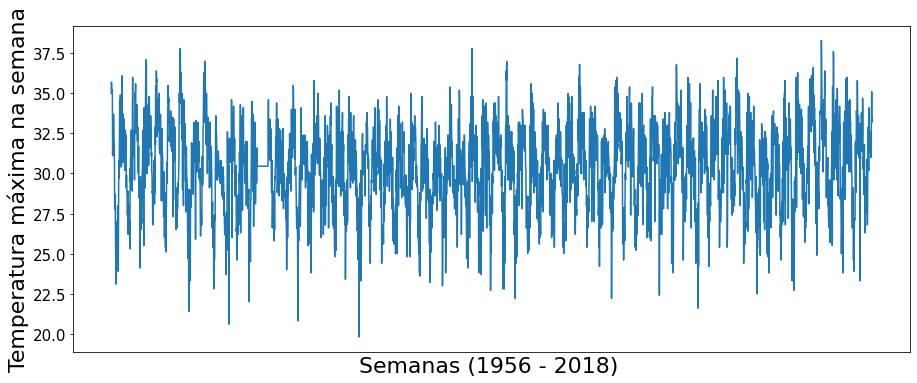

In [ ]:
label_size = 45
plt.rcParams['xtick.labelsize'] = label_size 

plt.plot(df)
plt.xlabel('Semanas (1956 - 2018) ', fontsize=22)




plt.ylabel('Temperatura máxima na semana', fontsize=22)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


##**For the whole dataset**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1114: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1115: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1138: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1260: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1474: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1475: DeprecationWarning: scipy.sqrt is depr

(array([15., 20., 25., 30., 35., 40., 45., 50.]),
 <a list of 8 Text major ticklabel objects>)

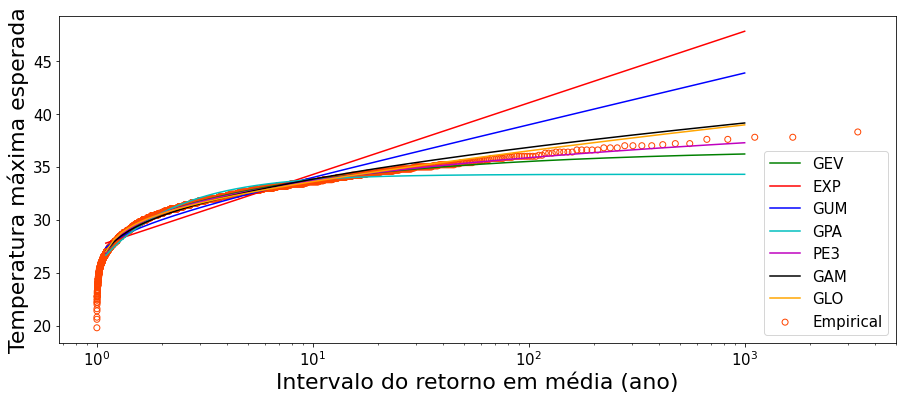

In [ ]:
#Trying the distributions
LMU_1 = samlmu(df)
gevfit_1 = pelgev(LMU_1)
expfit_1 = pelexp(LMU_1)
gumfit_1 = pelgum(LMU_1)
gpafit_1 = pelgpa(LMU_1)
pe3fit_1 = pelpe3(LMU_1)
gamfit_1 = pelgam(LMU_1)
glofit_1 = pelglo(LMU_1)

T = np.arange(0.1, 999.1, 0.1) + 1

gevST_1 = quagev(1.0-1./T, gevfit_1)
expST_1 = quaexp(1.0-1./T, expfit_1)  
gumST_1 = quagum(1.0-1./T, gumfit_1)
gpaST_1 = quagpa(1.0-1./T, gpafit_1)
pe3ST_1 = quape3(1.0-1./T, pe3fit_1)
gamST_1 = quagam(1.0-1./T, gamfit_1)
gloST_1 = quaglo(1.0-1./T, glofit_1)


plt.xscale('log')
plt.xlabel('Intervalo do retorno em média (ano)', fontsize=22)
plt.ylabel('Temperatura máxima esperada', fontsize=22)

# draw extreme values from GEV distribution
line1, = plt.plot(T, gevST_1, 'g', label='GEV')
line2, = plt.plot(T, expST_1, 'r', label='EXP')
line3, = plt.plot(T, gumST_1, 'b', label='GUM')
line5, = plt.plot(T, gpaST_1, 'c', label='GPA')
line6, = plt.plot(T, pe3ST_1, 'm', label='PE3')
line7, = plt.plot(T, gamST_1, 'k', label='GAM')
line8, = plt.plot(T, gloST_1, c='orange', label='GLO')

N_1    = np.r_[1:len(df.index)+1]*1.0 #must *1.0 to convert int to float
Nmax_1 = max(N_1)

plt.scatter(Nmax_1/N_1, sorted(df)[::-1], color = 'orangered', facecolors='none', label='Empirical')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=4)})

plt.legend(prop={'size':15})

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [ ]:

N_1    = np.r_[1:len(df.index)+1]*1.0 #must *1.0 to convert int to float
Nmax_1 = max(N_1)   
P0_1   = (N_1-1.)/Nmax_1
P_1    = np.delete(P0_1,0)

obs_1 = sorted(df)[1:]

# extreme precipitations
gevSTo_1 = quagev(P_1, gevfit_1)
expSTo_1 = quaexp(P_1, expfit_1)  
gumSTo_1 = quagum(P_1, gumfit_1)
gpaSTo_1 = quagpa(P_1, gpafit_1)
pe3STo_1 = quape3(P_1, pe3fit_1)
gamSTo_1 = quagam(P_1, gamfit_1)
gloSTo_1 = quaglo(P_1, glofit_1)

# do ks test
ks_1 = [('GEV', stats.ks_2samp(obs_1, gevSTo_1)), ('EXP', stats.ks_2samp(obs_1, expSTo_1)),
      ('GUM', stats.ks_2samp(obs_1, gumSTo_1)),
      ('GPA', stats.ks_2samp(obs_1, gpaSTo_1)), ('PE3', stats.ks_2samp(obs_1, pe3STo_1)), 
      ('GAM', stats.ks_2samp(obs_1, gamSTo_1)), ('GLO', stats.ks_2samp(obs_1, gloSTo_1))]

labels = ['Distribution', 'KS (statistics, pvalue)']
pd.DataFrame(ks_1, columns=labels)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1702: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1705: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1707: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1582: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1584: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1825: DeprecationWarning: scipy.array is deprecated and will b

,Distribution,"KS (statistics, pvalue)"
0,GEV,"(0.02784431137724551, 0.15005670730982543)"
1,EXP,"(0.18203592814371258, 9.386892256392483e-49)"
2,GUM,"(0.1188622754491018, 5.780424724090787e-21)"
3,GPA,"(0.0718562874251497, 6.398320927827267e-08)"
4,PE3,"(0.025748502994011976, 0.21817941310334849)"
5,GAM,"(0.05958083832335329, 1.4109155993515373e-05)"
6,GLO,"(0.0374251497005988, 0.018585208403839204)"


(array([17.5, 20. , 22.5, 25. , 27.5, 30. , 32.5, 35. , 37.5, 40. ]),
 <a list of 10 Text major ticklabel objects>)

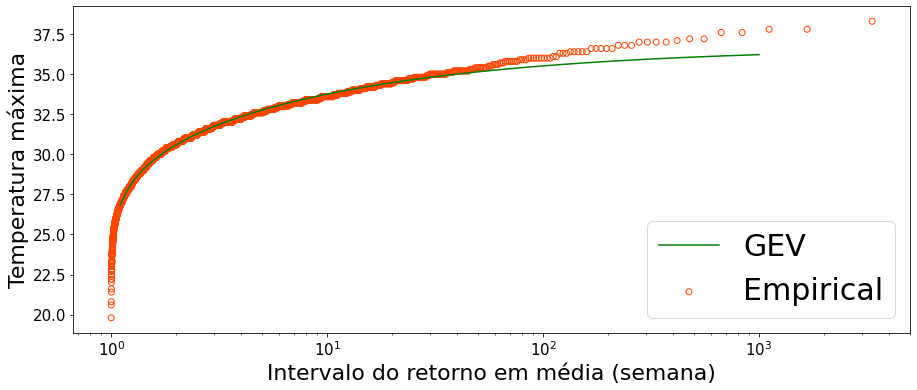

In [ ]:
#choose GEV
plt.xscale('log')
plt.xlabel('Intervalo do retorno em média (semana)', fontsize=22)
plt.ylabel('Temperatura máxima', fontsize=22)
line1, = plt.plot(T, gevST_1, 'g', label='GEV')

# draw extreme values from observations(empirical distribution)
N_1    = np.r_[1:len(df.index)+1]*1.0 #must *1.0 to convert int to float
Nmax_1 = max(N_1)

plt.scatter(Nmax_1/N_1, sorted(df)[::-1], color = 'orangered', facecolors='none', label='Empirical')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=4)})


plt.legend(prop={'size':30})

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#**Separate data (2000-2016)**
(2017-2019) tests

In [ ]:
df_1 = df.iloc[2333:3235]
teste =  df.iloc[3235:3341] 
df_1

Year-Week
2000-00    26.8
2000-01    32.0
2000-02    32.2
2000-03    32.8
2000-04    33.0
           ... 
2016-48    36.0
2016-49    31.2
2016-50    30.6
2016-51    33.3
2016-52    33.8
Name: N_AIRTMP_MAX, Length: 902, dtype: float64

(array([20. , 22.5, 25. , 27.5, 30. , 32.5, 35. , 37.5, 40. ]),
 <a list of 9 Text major ticklabel objects>)

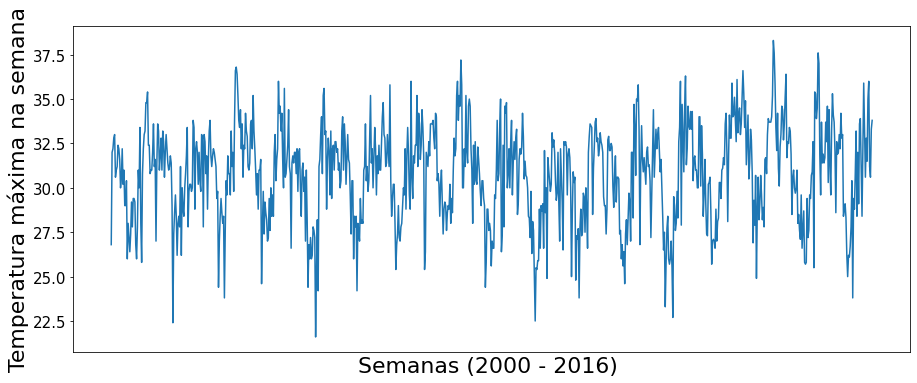

In [ ]:
df_1 
label_size = 45
plt.rcParams['xtick.labelsize'] = label_size 

plt.plot(df_1)
plt.xlabel('Semanas (2000 - 2016) ', fontsize=22)




plt.ylabel('Temperatura máxima na semana', fontsize=22)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

##**Trying the distributions**


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1114: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1115: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1138: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1260: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1474: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1475: DeprecationWarning: scipy.sqrt is depr

(array([20., 25., 30., 35., 40., 45., 50., 55.]),
 <a list of 8 Text major ticklabel objects>)

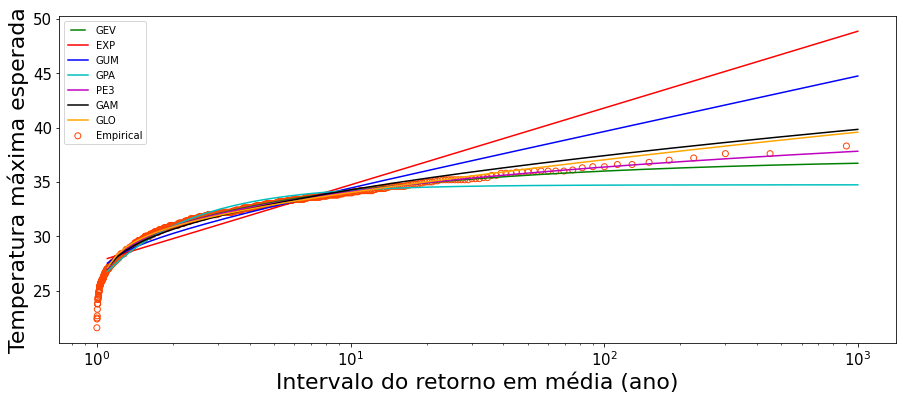

In [ ]:
#Trying the distributions
LMU_1 = samlmu(df_1)
gevfit_1 = pelgev(LMU_1)
expfit_1 = pelexp(LMU_1)
gumfit_1 = pelgum(LMU_1)
gpafit_1 = pelgpa(LMU_1)
pe3fit_1 = pelpe3(LMU_1)
gamfit_1 = pelgam(LMU_1)
glofit_1 = pelglo(LMU_1)

T = np.arange(0.1, 999.1, 0.1) + 1

gevST_1 = quagev(1.0-1./T, gevfit_1)
expST_1 = quaexp(1.0-1./T, expfit_1)  
gumST_1 = quagum(1.0-1./T, gumfit_1)
gpaST_1 = quagpa(1.0-1./T, gpafit_1)
pe3ST_1 = quape3(1.0-1./T, pe3fit_1)
gamST_1 = quagam(1.0-1./T, gamfit_1)
gloST_1 = quaglo(1.0-1./T, glofit_1)


plt.xscale('log')
plt.xlabel('Intervalo do retorno em média (ano)', fontsize=22)
plt.ylabel('Temperatura máxima esperada', fontsize=22)

# draw extreme values from GEV distribution
line1, = plt.plot(T, gevST_1, 'g', label='GEV')
line2, = plt.plot(T, expST_1, 'r', label='EXP')
line3, = plt.plot(T, gumST_1, 'b', label='GUM')
line5, = plt.plot(T, gpaST_1, 'c', label='GPA')
line6, = plt.plot(T, pe3ST_1, 'm', label='PE3')
line7, = plt.plot(T, gamST_1, 'k', label='GAM')
line8, = plt.plot(T, gloST_1, c='orange', label='GLO')

N_1    = np.r_[1:len(df_1.index)+1]*1.0 #must *1.0 to convert int to float
Nmax_1 = max(N_1)

plt.scatter(Nmax_1/N_1, sorted(df_1)[::-1], color = 'orangered', facecolors='none', label='Empirical')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=4)})


plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [ ]:

N_1    = np.r_[1:len(df_1.index)+1]*1.0 #must *1.0 to convert int to float
Nmax_1 = max(N_1)   
P0_1   = (N_1-1.)/Nmax_1
P_1    = np.delete(P0_1,0)

obs_1 = sorted(df_1)[1:]

# extreme precipitations
gevSTo_1 = quagev(P_1, gevfit_1)
expSTo_1 = quaexp(P_1, expfit_1)  
gumSTo_1 = quagum(P_1, gumfit_1)
gpaSTo_1 = quagpa(P_1, gpafit_1)
pe3STo_1 = quape3(P_1, pe3fit_1)
gamSTo_1 = quagam(P_1, gamfit_1)
gloSTo_1 = quaglo(P_1, glofit_1)

# do ks test
ks_1 = [('GEV', stats.ks_2samp(obs_1, gevSTo_1)), ('EXP', stats.ks_2samp(obs_1, expSTo_1)),
      ('GUM', stats.ks_2samp(obs_1, gumSTo_1)), 
      ('GPA', stats.ks_2samp(obs_1, gpaSTo_1)), ('PE3', stats.ks_2samp(obs_1, pe3STo_1)), 
      ('GAM', stats.ks_2samp(obs_1, gamSTo_1)), ('GLO', stats.ks_2samp(obs_1, gloSTo_1))]

labels = ['Distribution', 'KS (statistics, pvalue)']
pd.DataFrame(ks_1, columns=labels)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1702: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1705: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1707: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1582: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1584: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1825: DeprecationWarning: scipy.array is deprecated and will b

,Distribution,"KS (statistics, pvalue)"
0,GEV,"(0.02885682574916759, 0.8476153045143023)"
1,EXP,"(0.18312985571587126, 1.2919814589520558e-13)"
2,GUM,"(0.12097669256381798, 3.6590835043052937e-06)"
3,GPA,"(0.0732519422863485, 0.015873165690974658)"
4,PE3,"(0.03107658157602664, 0.77729619011823)"
5,GAM,"(0.06326304106548279, 0.05429786316618117)"
6,GLO,"(0.04550499445061043, 0.30855452184607396)"


##**Choosing GEV**

(array([20. , 22.5, 25. , 27.5, 30. , 32.5, 35. , 37.5, 40. ]),
 <a list of 9 Text major ticklabel objects>)

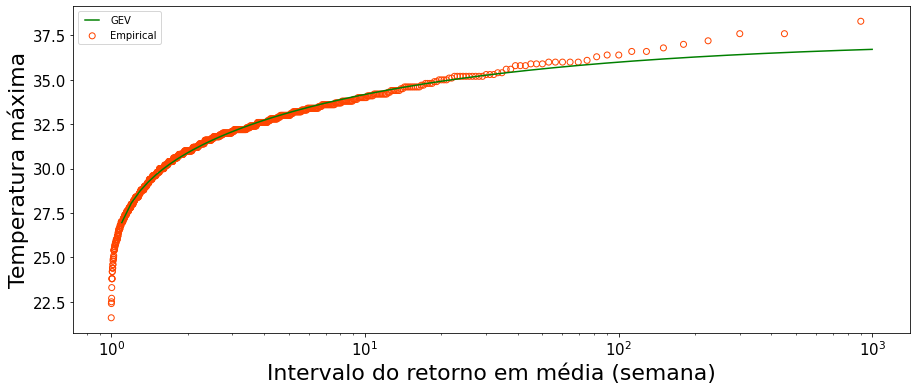

In [ ]:
##withot te 2 last years
plt.xscale('log')
plt.xlabel('Intervalo do retorno em média (semana)', fontsize=22)
plt.ylabel('Temperatura máxima', fontsize=22)
line1, = plt.plot(T, gevST_1, 'g', label='GEV')

# draw extreme values from observations(empirical distribution)
N_1    = np.r_[1:len(df_1.index)+1]*1.0 #must *1.0 to convert int to float
Nmax_1 = max(N_1)

plt.scatter(Nmax_1/N_1, sorted(df_1)[::-1], color = 'orangered', facecolors='none', label='Empirical')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=4)})



plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#**Repeating  for 8 years**
(2009-2016)

In [ ]:
url1 = '/content/gdrive/Shareddrives/Clima&Saúde/Dados/Dados_Clima/IAC/data/processed/IAC_HW1956_2018.csv'
df1 = pd.read_csv(url1)

In [ ]:
df1['DATE'] = pd.to_datetime(df1['DATE'])

df1['Year-Week'] = df1['DATE'].dt.strftime('%Y-%U')

iac_tutorial = df1[['Unnamed: 0','N_AIRTMP_MAX', 'Year-Week']]

df = iac_tutorial.groupby("Year-Week").N_AIRTMP_MAX.max()

df_1 = df.iloc[2811:3235]
teste =  df.iloc[3235:3341] 
df_1

Year-Week
2009-00    31.6
2009-01    32.8
2009-02    33.3
2009-03    28.5
2009-04    29.2
           ... 
2016-48    36.0
2016-49    31.2
2016-50    30.6
2016-51    33.3
2016-52    33.8
Name: N_AIRTMP_MAX, Length: 424, dtype: float64

##**Trying the distributions**
(8 years)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1114: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1115: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1138: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1260: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1474: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1475: DeprecationWarning: scipy.sqrt is depr

(array([20., 25., 30., 35., 40., 45., 50., 55.]),
 <a list of 8 Text major ticklabel objects>)

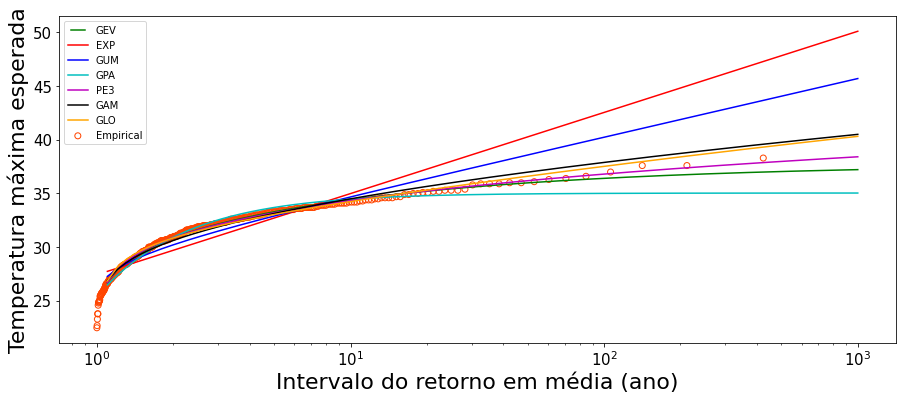

In [ ]:
LMU_1 = samlmu(df_1)
gevfit_1 = pelgev(LMU_1)
expfit_1 = pelexp(LMU_1)
gumfit_1 = pelgum(LMU_1)
gpafit_1 = pelgpa(LMU_1)
pe3fit_1 = pelpe3(LMU_1)
gamfit_1 = pelgam(LMU_1)
glofit_1 = pelglo(LMU_1)

T = np.arange(0.1, 999.1, 0.1) + 1

gevST_1 = quagev(1.0-1./T, gevfit_1)
expST_1 = quaexp(1.0-1./T, expfit_1)  
gumST_1 = quagum(1.0-1./T, gumfit_1)
gpaST_1 = quagpa(1.0-1./T, gpafit_1)
pe3ST_1 = quape3(1.0-1./T, pe3fit_1)
gamST_1 = quagam(1.0-1./T, gamfit_1)
gloST_1 = quaglo(1.0-1./T, glofit_1)


plt.xscale('log')
plt.xlabel('Intervalo do retorno em média (ano)', fontsize=22)
plt.ylabel('Temperatura máxima esperada', fontsize=22)

# draw extreme values from GEV distribution
line1, = plt.plot(T, gevST_1, 'g', label='GEV')
line2, = plt.plot(T, expST_1, 'r', label='EXP')
line3, = plt.plot(T, gumST_1, 'b', label='GUM')
line5, = plt.plot(T, gpaST_1, 'c', label='GPA')
line6, = plt.plot(T, pe3ST_1, 'm', label='PE3')
line7, = plt.plot(T, gamST_1, 'k', label='GAM')
line8, = plt.plot(T, gloST_1, c='orange', label='GLO')

N_1    = np.r_[1:len(df_1.index)+1]*1.0 #must *1.0 to convert int to float
Nmax_1 = max(N_1)

plt.scatter(Nmax_1/N_1, sorted(df_1)[::-1], color = 'orangered', facecolors='none', label='Empirical')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=4)})


plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [ ]:
N_1    = np.r_[1:len(df_1.index)+1]*1.0 #must *1.0 to convert int to float
Nmax_1 = max(N_1)   
P0_1   = (N_1-1.)/Nmax_1
P_1    = np.delete(P0_1,0)

obs_1 = sorted(df_1)[1:]

# extreme precipitations
gevSTo_1 = quagev(P_1, gevfit_1)
expSTo_1 = quaexp(P_1, expfit_1)  
gumSTo_1 = quagum(P_1, gumfit_1)
gpaSTo_1 = quagpa(P_1, gpafit_1)
pe3STo_1 = quape3(P_1, pe3fit_1)
gamSTo_1 = quagam(P_1, gamfit_1)
gloSTo_1 = quaglo(P_1, glofit_1)

# do ks test
ks_1 = [('GEV', stats.ks_2samp(obs_1, gevSTo_1)), ('EXP', stats.ks_2samp(obs_1, expSTo_1)),
      ('GUM', stats.ks_2samp(obs_1, gumSTo_1)), 
      ('GPA', stats.ks_2samp(obs_1, gpaSTo_1)), ('PE3', stats.ks_2samp(obs_1, pe3STo_1)), 
      ('GAM', stats.ks_2samp(obs_1, gamSTo_1)), ('GLO', stats.ks_2samp(obs_1, gloSTo_1))]

labels = ['Distribution', 'KS (statistics, pvalue)']
pd.DataFrame(ks_1, columns=labels)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1702: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1705: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1707: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1582: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1584: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1825: DeprecationWarning: scipy.array is deprecated and will b

,Distribution,"KS (statistics, pvalue)"
0,GEV,"(0.04018912529550828, 0.8847124544905972)"
1,EXP,"(0.17966903073286053, 2.2161564974532856e-06)"
2,GUM,"(0.12293144208037825, 0.003319706864315651)"
3,GPA,"(0.061465721040189124, 0.4015962887518268)"
4,PE3,"(0.04491725768321513, 0.7876267682739423)"
5,GAM,"(0.07565011820330969, 0.17767718190753262)"
6,GLO,"(0.0591016548463357, 0.45141753119061667)"


##**Choosing GEV**
(8 years)

(array([20., 22., 24., 26., 28., 30., 32., 34., 36., 38., 40.]),
 <a list of 11 Text major ticklabel objects>)

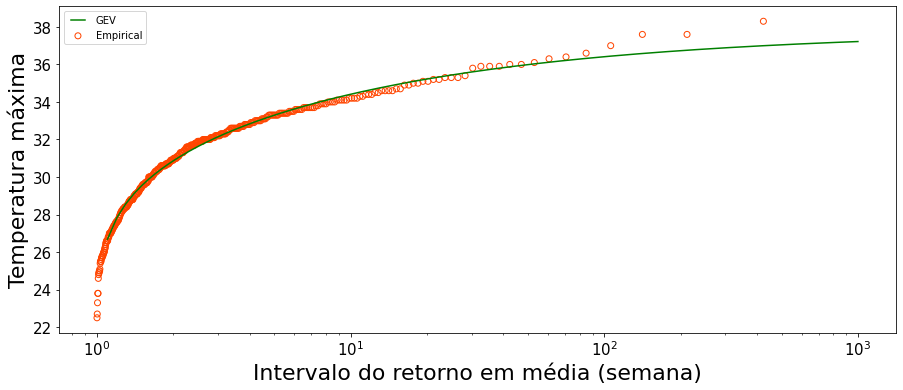

In [ ]:
plt.xscale('log')
plt.xlabel('Intervalo do retorno em média (semana)', fontsize=22)
plt.ylabel('Temperatura máxima', fontsize=22)
line1, = plt.plot(T, gevST_1, 'g', label='GEV')

# draw extreme values from observations(empirical distribution)
N_1    = np.r_[1:len(df_1.index)+1]*1.0 #must *1.0 to convert int to float
Nmax_1 = max(N_1)

plt.scatter(Nmax_1/N_1, sorted(df_1)[::-1], color = 'orangered', facecolors='none', label='Empirical')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=4)})



plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#**Repeating  for 4 years**
(2013-2016)

In [ ]:
url1 = '/content/gdrive/Shareddrives/Clima&Saúde/Dados/Dados_Clima/IAC/data/processed/IAC_HW1956_2018.csv'
df1 = pd.read_csv(url1)

In [ ]:
df1['DATE'] = pd.to_datetime(df1['DATE'])

df1['Year-Week'] = df1['DATE'].dt.strftime('%Y-%U')

iac_tutorial = df1[['Unnamed: 0','N_AIRTMP_MAX', 'Year-Week']]

df = iac_tutorial.groupby("Year-Week").N_AIRTMP_MAX.max()
df_1 = df.iloc[3023:3235]
teste =  df.iloc[3235:3341]
df_1

Year-Week
2013-00    31.6
2013-01    31.8
2013-02    31.0
2013-03    31.0
2013-04    30.0
           ... 
2016-48    36.0
2016-49    31.2
2016-50    30.6
2016-51    33.3
2016-52    33.8
Name: N_AIRTMP_MAX, Length: 212, dtype: float64

##**Trying the distributions**
(4 years)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1114: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1115: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1138: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1260: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1474: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1475: DeprecationWarning: scipy.sqrt is depr

(array([20., 25., 30., 35., 40., 45., 50., 55.]),
 <a list of 8 Text major ticklabel objects>)

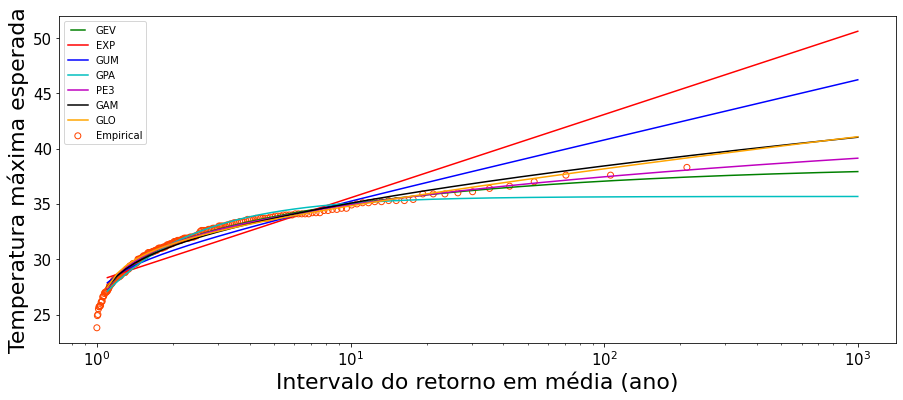

In [ ]:
LMU_1 = samlmu(df_1)
gevfit_1 = pelgev(LMU_1)
expfit_1 = pelexp(LMU_1)
gumfit_1 = pelgum(LMU_1)
gpafit_1 = pelgpa(LMU_1)
pe3fit_1 = pelpe3(LMU_1)
gamfit_1 = pelgam(LMU_1)
glofit_1 = pelglo(LMU_1)

T = np.arange(0.1, 999.1, 0.1) + 1

gevST_1 = quagev(1.0-1./T, gevfit_1)
expST_1 = quaexp(1.0-1./T, expfit_1)  
gumST_1 = quagum(1.0-1./T, gumfit_1)
gpaST_1 = quagpa(1.0-1./T, gpafit_1)
pe3ST_1 = quape3(1.0-1./T, pe3fit_1)
gamST_1 = quagam(1.0-1./T, gamfit_1)
gloST_1 = quaglo(1.0-1./T, glofit_1)


plt.xscale('log')
plt.xlabel('Intervalo do retorno em média (ano)', fontsize=22)
plt.ylabel('Temperatura máxima esperada', fontsize=22)

# draw extreme values from GEV distribution
line1, = plt.plot(T, gevST_1, 'g', label='GEV')
line2, = plt.plot(T, expST_1, 'r', label='EXP')
line3, = plt.plot(T, gumST_1, 'b', label='GUM')
line5, = plt.plot(T, gpaST_1, 'c', label='GPA')
line6, = plt.plot(T, pe3ST_1, 'm', label='PE3')
line7, = plt.plot(T, gamST_1, 'k', label='GAM')
line8, = plt.plot(T, gloST_1, c='orange', label='GLO')

N_1    = np.r_[1:len(df_1.index)+1]*1.0 #must *1.0 to convert int to float
Nmax_1 = max(N_1)

plt.scatter(Nmax_1/N_1, sorted(df_1)[::-1], color = 'orangered', facecolors='none', label='Empirical')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=4)})


plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [ ]:

N_1    = np.r_[1:len(df_1.index)+1]*1.0 #must *1.0 to convert int to float
Nmax_1 = max(N_1)   
P0_1   = (N_1-1.)/Nmax_1
P_1    = np.delete(P0_1,0)

obs_1 = sorted(df_1)[1:]

# extreme precipitations
gevSTo_1 = quagev(P_1, gevfit_1)
expSTo_1 = quaexp(P_1, expfit_1)  
gumSTo_1 = quagum(P_1, gumfit_1)
gpaSTo_1 = quagpa(P_1, gpafit_1)
pe3STo_1 = quape3(P_1, pe3fit_1)
gamSTo_1 = quagam(P_1, gamfit_1)
gloSTo_1 = quaglo(P_1, glofit_1)

# do ks test
ks_1 = [('GEV', stats.ks_2samp(obs_1, gevSTo_1)), ('EXP', stats.ks_2samp(obs_1, expSTo_1)),
      ('GUM', stats.ks_2samp(obs_1, gumSTo_1)), 
      ('GPA', stats.ks_2samp(obs_1, gpaSTo_1)), ('PE3', stats.ks_2samp(obs_1, pe3STo_1)), 
      ('GAM', stats.ks_2samp(obs_1, gamSTo_1)), ('GLO', stats.ks_2samp(obs_1, gloSTo_1))]

labels = ['Distribution', 'KS (statistics, pvalue)']
pd.DataFrame(ks_1, columns=labels)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1702: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1705: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1707: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1582: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1584: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1825: DeprecationWarning: scipy.array is deprecated and will b

,Distribution,"KS (statistics, pvalue)"
0,GEV,"(0.04265402843601896, 0.9910447725918983)"
1,EXP,"(0.17535545023696683, 0.0029882105309984785)"
2,GUM,"(0.11374407582938388, 0.13049952491146696)"
3,GPA,"(0.07582938388625593, 0.5800033666056161)"
4,PE3,"(0.04739336492890995, 0.972355250158759)"
5,GAM,"(0.07109004739336493, 0.6618047863235534)"
6,GLO,"(0.06635071090047394, 0.7430434932153365)"


##**Choosing GEV**
(4 years)

(array([22., 24., 26., 28., 30., 32., 34., 36., 38., 40.]),
 <a list of 10 Text major ticklabel objects>)

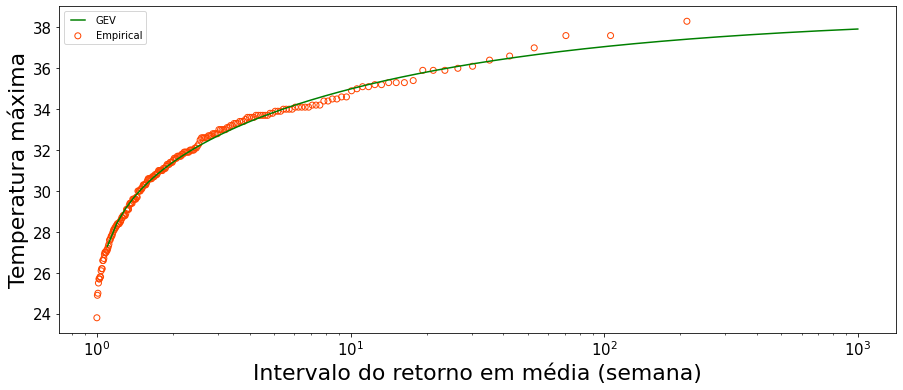

In [ ]:
plt.xscale('log')
plt.xlabel('Intervalo do retorno em média (semana)', fontsize=22)
plt.ylabel('Temperatura máxima', fontsize=22)
line1, = plt.plot(T, gevST_1, 'g', label='GEV')

# draw extreme values from observations(empirical distribution)
N_1    = np.r_[1:len(df_1.index)+1]*1.0 #must *1.0 to convert int to float
Nmax_1 = max(N_1)

plt.scatter(Nmax_1/N_1, sorted(df_1)[::-1], color = 'orangered', facecolors='none', label='Empirical')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=4)})



plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#**Using R**
Now that we know GEV fits the week extremes, let's use R to model

In [ ]:
%load_ext rpy2.ipython


##**Library**

In [ ]:
%%R
install.packages("extRemes")
library(extRemes)
install.packages("readr")
library(readr)
install.packages("readxl")
library(readxl)
install.packages("dplyr")
library(dplyr)
install.packages("lubridate")
library(lubridate)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘RcppArmadillo’, ‘Lmoments’, ‘distillery’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/RcppArmadillo_0.10.6.0.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 1673880 bytes (1.6 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to 

##**Import data and preparation**
(in R)

In [ ]:
%%R
df_1 = read_csv('/content/gdrive/Shared drives/Clima&Saúde/Dados/Dados_Clima/IAC/data/processed/IAC_1890_2018.csv')

df_1 = data.frame(df_1['DATE'], df_1['N_AIRTMP_MAX'])
head(df_1)

# convert Date field in CSV to R date format
df_1$DATE <- as.Date(df_1$DATE)

#  Get months
df_1$Month <- months(df_1$DATE)

#  Get years
df_1$Year <- year(df_1$DATE)



df_origins = subset(df_1, Year >= 2000)

df_origins$Weeka<-strftime(df_origins$DATE,format="%Y-%W",tz="CET")


Rows: 47116 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (5): YEAR, DAY365, N_RAIN_TOT, N_AIRTMP_MAX, N_AIRTMP_MIN
date (1): DATE

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
%%R

na_aux =which(is.na(df_origins$N_AIRTMP_MAX))
#na_aux = which(is.na(df_teste$N_AIRTMP_MAX))
df_origins[na_aux,]
df_origins[na_aux,'N_AIRTMP_MAX'] <- (df_origins[na_aux-1,'N_AIRTMP_MAX'] + df_origins[na_aux+1,'N_AIRTMP_MAX'])/ 2



###############
#2000 até 2018
#df_origins = df %>% slice(c(16061:22995))
##############

#2000 até 2016

df =  subset(df_origins, Year >= 2000) # & Year<= 2016
df_teste =  subset(df_origins, Year > 2016)

a = df %>%
  group_by(Weeka) %>%
  summarise_at(vars(N_AIRTMP_MAX), funs(mean(., na.rm=TRUE)))


##**Fit using MLE**
Note that the MLE does not work as a method for fitting the extremes of the distribution

R[write to console]: Error in plot.window(...) : need finite 'ylim' values

R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: 
R[write to console]: In system("timedatectl", intern = TRUE) :
R[write to console]: 
 
R[write to console]:  running command 'timedatectl' had status 1

R[write to console]: 2: `funs()` was deprecated in dplyr 0.8.0.
Please use a list of either functions or lambdas: 

  # Simple named list: 
  list(mean = mean, median = median)

  # Auto named with `tibble::lst()`: 
  tibble::lst(mean, median)

  # Using lambdas
  list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated. 

R[write to console]: 3: 
R[write to console]: In log(z) :
R[write to console]:  NaNs produced

R[write to console]: 4: 
R[write to console]: In log(z) :
R[write to console]:  NaNs produced

R[write to console]: 5: 
R[write to con


Error in plot.window(...) : need finite 'ylim' values


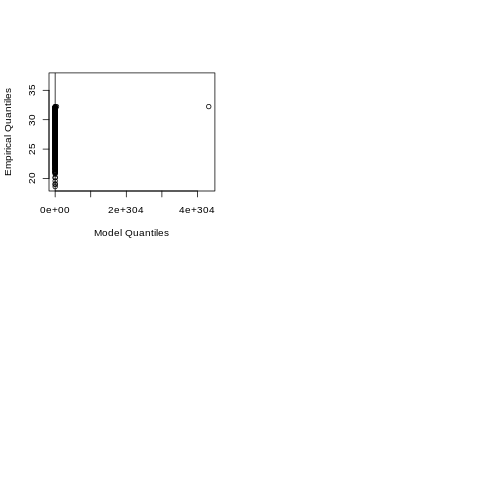

RInterpreterError: ignored

In [ ]:
%%R



# fit by mle
fit_mle_week <- fevd(as.vector(a$N_AIRTMP_MAX), method = "MLE", type="GEV", period.basis = "week")
plot(fit_mle_week)

rl_mle_week <- return.level(fit_mle_week, conf = 0.05, return.period= c(3,6,12,24,48,120,180))

rl_mle_week


##**Using L - moments**
(16 years. 2000 - 2016)

fevd(x = as.vector(a$N_AIRTMP_MAX), type = "GEV", method = "Lmoments", 
    period.basis = "week")
get(paste("return.level.fevd.", newcl, sep = ""))(x = x, return.period = return.period, 
    conf = 0.05)

 GEV model fitted to  as.vector(a$N_AIRTMP_MAX)  
Data are assumed to be  stationary 
[1] "Return Levels for period units in weeks"
  3-week level   6-week level  12-week level  24-week level  48-week level 
      29.43764       30.87986       31.85645       32.55934       33.07822 
120-week level 180-week level 
      33.56860       33.73301 


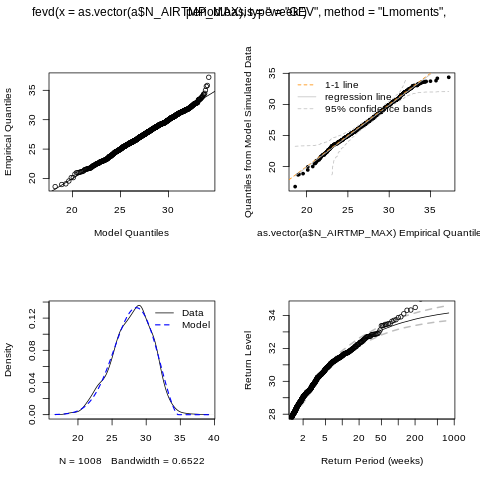

In [ ]:
%%R

#fit by lmoments
fit_lmon_week_16 <- fevd(as.vector(a$N_AIRTMP_MAX), method = "Lmoments", type="GEV", period.basis = "week")
plot(fit_lmon_week_16)

rl_lmom_week_16 <- return.level(fit_lmon_week_16, conf = 0.05, return.period= c(3,6,12,24,48,120,180))

rl_lmom_week_16

##**8 Years**
(2009 - 2016)

fevd(x = as.vector(b$N_AIRTMP_MAX), type = "GEV", method = "Lmoments", 
    period.basis = "week")
get(paste("return.level.fevd.", newcl, sep = ""))(x = x, return.period = return.period, 
    conf = 0.05)

 GEV model fitted to  as.vector(b$N_AIRTMP_MAX)  
Data are assumed to be  stationary 
[1] "Return Levels for period units in weeks"
  3-week level   6-week level  12-week level  24-week level  48-week level 
      29.36830       30.96028       32.06252       32.87266       33.48304 
120-week level 180-week level 
      34.07337       34.27525 


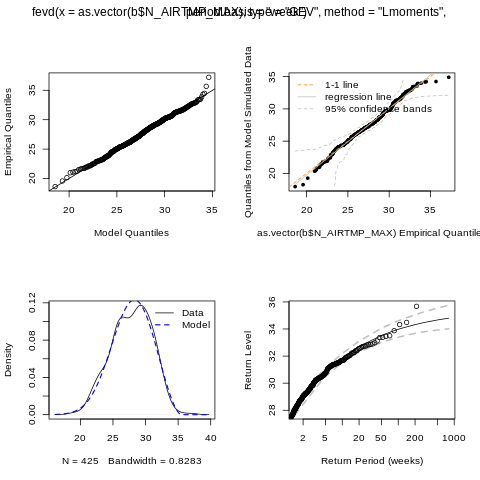

In [ ]:
%%R

df_8anos =  subset(df_origins, Year > 2008 & Year<= 2016)
df_teste_8anos =  subset(df_origins, Year > 2016)

b = df_8anos %>%
  group_by(Weeka) %>%
  summarise_at(vars(N_AIRTMP_MAX), funs(mean(., na.rm=TRUE)))


fit_mle_week_8anos <- fevd(as.vector(b$N_AIRTMP_MAX), method = "MLE", type="GEV", period.basis = "week")

rl_mle_week_8anos <- return.level(fit_mle_week_8anos, conf = 0.05, return.period= c(3,6,12,24,48,120,180))

rl_mle_week_8anos


#fit by lmoments
fit_lmon_week_8 <- fevd(as.vector(b$N_AIRTMP_MAX), method = "Lmoments", type="GEV", period.basis = "week")
plot(fit_lmon_week_8)

rl_lmom_week_8 <- return.level(fit_lmon_week_8, conf = 0.05, return.period= c(3,6,12,24,48,120,180))

rl_lmom_week_8




##**4 Years**
(2013 - 2016)

fevd(x = as.vector(c$N_AIRTMP_MAX), type = "GEV", method = "Lmoments", 
    period.basis = "week")
get(paste("return.level.fevd.", newcl, sep = ""))(x = x, return.period = return.period, 
    conf = 0.05)

 GEV model fitted to  as.vector(c$N_AIRTMP_MAX)  
Data are assumed to be  stationary 
[1] "Return Levels for period units in weeks"
  3-week level   6-week level  12-week level  24-week level  48-week level 
      29.87703       31.50193       32.64166       33.48968       34.13629 
120-week level 180-week level 
      34.77014       34.98941 


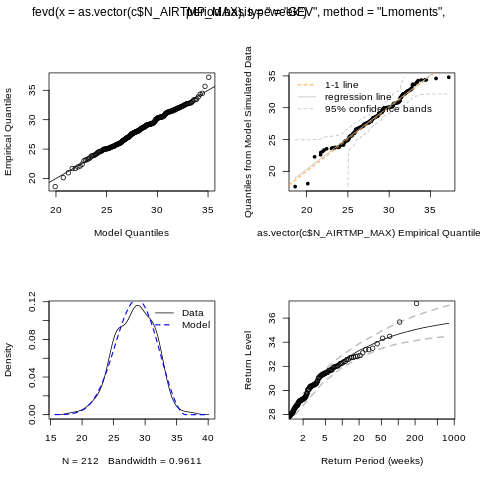

In [ ]:
%%R

df_4anos =  subset(df_origins, Year > 2012 & Year<= 2016)
df_teste_4anos =  subset(df_origins, Year > 2016)

c = df_4anos %>%
  group_by(Weeka) %>%
  summarise_at(vars(N_AIRTMP_MAX), funs(mean(., na.rm=TRUE)))


fit_mle_week_4anos <- fevd(as.vector(c$N_AIRTMP_MAX), method = "MLE", type="GEV", period.basis = "week")

rl_mle_week_4anos <- return.level(fit_mle_week_4anos, conf = 0.05, return.period= c(3,6,12,24,48,120,180))

rl_mle_week_4anos


#fit by lmoments
fit_lmon_week_4 <- fevd(as.vector(c$N_AIRTMP_MAX), method = "Lmoments", type="GEV", period.basis = "week")
plot(fit_lmon_week_4)

rl_lmom_week_4 <- return.level(fit_lmon_week_4, conf = 0.05, return.period= c(3,6,12,24,48,120,180))

rl_lmom_week_4

#**Comparação dos modelos em R**

In [ ]:
%%R
rl_lmom_week_16

fevd(x = as.vector(a$N_AIRTMP_MAX), type = "GEV", method = "Lmoments", 
    period.basis = "week")
get(paste("return.level.fevd.", newcl, sep = ""))(x = x, return.period = return.period, 
    conf = 0.05)

 GEV model fitted to  as.vector(a$N_AIRTMP_MAX)  
Data are assumed to be  stationary 
[1] "Return Levels for period units in weeks"
  3-week level   6-week level  12-week level  24-week level  48-week level 
      29.43764       30.87986       31.85645       32.55934       33.07822 
120-week level 180-week level 
      33.56860       33.73301 


In [ ]:
%%R
rl_lmom_week_8

fevd(x = as.vector(b$N_AIRTMP_MAX), type = "GEV", method = "Lmoments", 
    period.basis = "week")
get(paste("return.level.fevd.", newcl, sep = ""))(x = x, return.period = return.period, 
    conf = 0.05)

 GEV model fitted to  as.vector(b$N_AIRTMP_MAX)  
Data are assumed to be  stationary 
[1] "Return Levels for period units in weeks"
  3-week level   6-week level  12-week level  24-week level  48-week level 
      29.36830       30.96028       32.06252       32.87266       33.48304 
120-week level 180-week level 
      34.07337       34.27525 


In [ ]:
%%R
rl_lmom_week_4

fevd(x = as.vector(c$N_AIRTMP_MAX), type = "GEV", method = "Lmoments", 
    period.basis = "week")
get(paste("return.level.fevd.", newcl, sep = ""))(x = x, return.period = return.period, 
    conf = 0.05)

 GEV model fitted to  as.vector(c$N_AIRTMP_MAX)  
Data are assumed to be  stationary 
[1] "Return Levels for period units in weeks"
  3-week level   6-week level  12-week level  24-week level  48-week level 
      29.87703       31.50193       32.64166       33.48968       34.13629 
120-week level 180-week level 
      34.77014       34.98941 
